In [953]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle

# To ignore warnings generated in the notebook
import warnings
warnings.filterwarnings(action='ignore')
#!pip install pmdarima

### Problem Statement: Find the modal price of tomato for given city on given day.

Dataset contains prices of commodities across different states of India spreaded across different markets per district.
Commodity has different grades and varieties.
Dataset contains minimum, maximum and modal price per quintal on a day.




In [954]:
df = pd.read_csv(r"C:\Users\vidya\OneDrive\Desktop\python\Mission_2020\tomato_all.csv")
df

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,09-Dec-20
1,2,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,20-Nov-20
2,3,Hassan,Arasikere,Tomato,Tomato,FAQ,750,750,750,07-Apr-20
3,4,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,12-Mar-20
4,5,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,06-Mar-20
...,...,...,...,...,...,...,...,...,...,...
35539,35540,Udupi,Udupi,Tomato,Tomato,Medium,1000,1400,1200,28-Jan-15
35540,35541,Udupi,Udupi,Tomato,Tomato,FAQ,1000,1400,1200,28-Jan-15
35541,35542,Udupi,Udupi,Tomato,Tomato,FAQ,1500,1900,1700,21-Jan-15
35542,35543,Udupi,Udupi,Tomato,Tomato,FAQ,1400,1800,1600,14-Jan-15


Renaming the columns of dataframe to use handy names.


*   Removal of (Rs./Quintal) phrase from column name
*   Removal of trailing spaces from column name
*   Replacing spaces present in names by _ char

In [955]:
df.rename(columns=lambda x: x.split("(")[0].rstrip().replace(" ", "_"), inplace=True)
list(df.columns)

['Sl_no.',
 'District_Name',
 'Market_Name',
 'Commodity',
 'Variety',
 'Grade',
 'Min_Price',
 'Max_Price',
 'Modal_Price',
 'Price_Date']

# Exploratory data Analysis


In [956]:
print('Total no of entries: ', df.shape)

Total no of entries:  (35544, 10)


#### Observations:


*  Dataset comprises of 35544  observations spreaded across 10 attributes.
*  Out of which 1 is dependent variable (Modal Price) and rest 9 are independent variables.

#### Why time series ?
* Need to predict future data from past data and data varies with time so time series analysis will best fit for this problem.  



#### Action: Data formatting for time series
* Index creation in date-time format 
* Sorted data by date-time 


In [957]:
df['Price_Date'] = pd.to_datetime(df.Price_Date)

print(type(df['Price_Date'][0]))

df.head(3)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Sl_no.,District_Name,Market_Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price_Date
0,1,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,2020-12-09
1,2,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,2020-11-20
2,3,Hassan,Arasikere,Tomato,Tomato,FAQ,750,750,750,2020-04-07


In [958]:
df.sort_values(by=["Price_Date"], inplace=True, ascending=True)

df.index = df.Price_Date

df.head(3)

,Sl_no.,District_Name,Market_Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price_Date
Price_Date,,,,,,,,,,
2015-01-01,14449,Davangere,Davangere,Tomato,Tomato,FAQ,400,600,500,2015-01-01
2015-01-01,29472,Mandya,Nagamangala,Tomato,Tomato,FAQ,1000,1000,1000,2015-01-01
2015-01-01,20575,Mysore,K.R.Nagar,Tomato,Tomato,FAQ,1000,1000,1000,2015-01-01


#### Action: Discarding non-informativate attributes

*   Discarding 'sr no' column from dataframe as it will not provide any information in model prediction.
*   Discarding 'Commodity' column as it has only one value as Tomato(constant value) and thats why it will not help us in model prediction.
*   Discrading 'Price Date' column as we used this column as index of dataframe.


In [959]:
df = df.drop(columns=['Sl_no.',  'Commodity','Price_Date'])
df.head(2)

,District_Name,Market_Name,Variety,Grade,Min_Price,Max_Price,Modal_Price
Price_Date,,,,,,,
2015-01-01,Davangere,Davangere,Tomato,FAQ,400,600,500
2015-01-01,Mandya,Nagamangala,Tomato,FAQ,1000,1000,1000


#### Observations:

*   Data has only string and integer values.
*   No variable column has null/missing values.

In [960]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35544 entries, 2015-01-01 to 2021-02-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   District_Name  35544 non-null  object
 1   Market_Name    35544 non-null  object
 2   Variety        35544 non-null  object
 3   Grade          35544 non-null  object
 4   Min_Price      35544 non-null  int64 
 5   Max_Price      35544 non-null  int64 
 6   Modal_Price    35544 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.2+ MB



#### Action: Downcasting 
* Changing default Object data type to category for catogorical variables.    

#### Obervation:
* Size of dataaset has reduced from 2.4+ MB to 1.2 MB with the downcasting
* Tried to change datatype interge(64) to unsinged integers(8/0-255) to make dataset light but faced issue of data corruption as data set has some really higher values of price (>20000)  


In [961]:
df = df.astype({'District_Name':'category', 'Market_Name':'category',
                           'Variety':'category', 'Grade':'category'})
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35544 entries, 2015-01-01 to 2021-02-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   District_Name  35544 non-null  category
 1   Market_Name    35544 non-null  category
 2   Variety        35544 non-null  category
 3   Grade          35544 non-null  category
 4   Min_Price      35544 non-null  int64   
 5   Max_Price      35544 non-null  int64   
 6   Modal_Price    35544 non-null  int64   
dtypes: category(4), int64(3)
memory usage: 1.2 MB


In [962]:
df.head()

,District_Name,Market_Name,Variety,Grade,Min_Price,Max_Price,Modal_Price
Price_Date,,,,,,,
2015-01-01,Davangere,Davangere,Tomato,FAQ,400,600,500
2015-01-01,Mandya,Nagamangala,Tomato,FAQ,1000,1000,1000
2015-01-01,Mysore,K.R.Nagar,Tomato,FAQ,1000,1000,1000
2015-01-01,Hassan,Hassan,Tomato,FAQ,857,1000,913
2015-01-01,Kolar,Chickkaballapura,Tomato,FAQ,300,1600,1100


In [964]:
df.index[0]

Timestamp('2015-01-01 00:00:00')

In [963]:
print('Total no of entries: ', df.shape)

print('Entries are available From {} To  {}'.format(df.index[0].date(), df.index[-1].date()))

Total no of entries:  (35544, 7)
Entries are available From 2015-01-01 To  2021-02-01


#### Action: Currupt and Null value inspection

In [651]:
print('No of records with negative Modal prize: ', df[df['Modal_Price']<0].shape[0])

print('No of records with negative Min prize: ', df[df['Min_Price']<0].shape[0])

print('No of records with negative Max prize: ', df[df['Max_Price']<0].shape[0])

df.isna().count()

No of records with negative Modal prize:  0
No of records with negative Min prize:  0
No of records with negative Max prize:  0


District_Name    35544
Market_Name      35544
Variety          35544
Grade            35544
Min_Price        35544
Max_Price        35544
Modal_Price      35544
dtype: int64

#### Observations:

*  Mean value is grater than median value (50 percentile) of each numerical column shoes data is Right skewed. 


*  There is notably a large difference between 75 percentile and max values of predictors "Min_Price", "Max_Price" , "Modal_Price". Thus it shows exstistance of extreme values(Outliers) in our data set.


* mean(min_price) < mean(modal_price) < mean(max_price) 


* std_dev(min_price) < std_dev(modal_price) < std_dev (max_price) 



In [652]:
#various summary statistics

df.describe()

,Min_Price,Max_Price,Modal_Price
count,35544.000000,35544.000000,35544.000000
mean,849.194829,1550.602633,1209.776165
std,797.681993,1165.053024,921.753222
min,15.000000,100.000000,70.000000
25%,334.000000,800.000000,600.000000
50%,600.000000,1200.000000,970.000000
75%,1000.000000,2000.000000,1500.000000
max,20000.000000,30000.000000,25000.000000


In [1294]:
#Total number of Outliers in Dataset 

Outliers = {}
print("Total Records: ", df.describe()[col].loc['count'])
for col in df.describe().columns:
    
    
    q3 = df.describe()[col].loc['75%']
    iqr= df.describe()[col].loc['75%'] - df.describe()[col].loc['25%']
    
    upper_bound =q3 + 1.5*iqr
    
    
    Outliers[col]= [upper_bound, df[df[col]>upper_bound][col]]
    #print(len(df[df[col]>upper_bound][col].values))
    #print(df[df[col]>upper_bound][col].nunique())
    
for col in list(Outliers.keys())[2:]:
    print("For column : {} \n\tUpper bound : {}\n\tList of outliers: {}\n\tTotal Outliers: {}\n\tTotal unique values are {}".format(col, Outliers[col][0], Outliers[col][1].values, len(Outliers[col][1].values), Outliers[col][1].nunique()))
    print()
    print('Total Outlier percentage : {}%'.format(round((len(Outliers[col][1].values)/ df.describe()[col].loc['count'])*100),3))
    print()

Total Records:  35544.0
For column : Modal_Price 
	Upper bound : 2850.0
	List of outliers: [3000 8000 3000 ... 3500 3500 3500]
	Total Outliers: 2259
	Total unique values are 316

Total Outlier percentage : 6%



Observations:

*  Distribution shows data is right skewed as more values of attributes are spreaded on right side. 


*  Modal_price distribution almost follows max_price disrtibution.


*  Total number of outliers are just 6% of total records but their weightage is high so discarding them will impact on skewness of data.


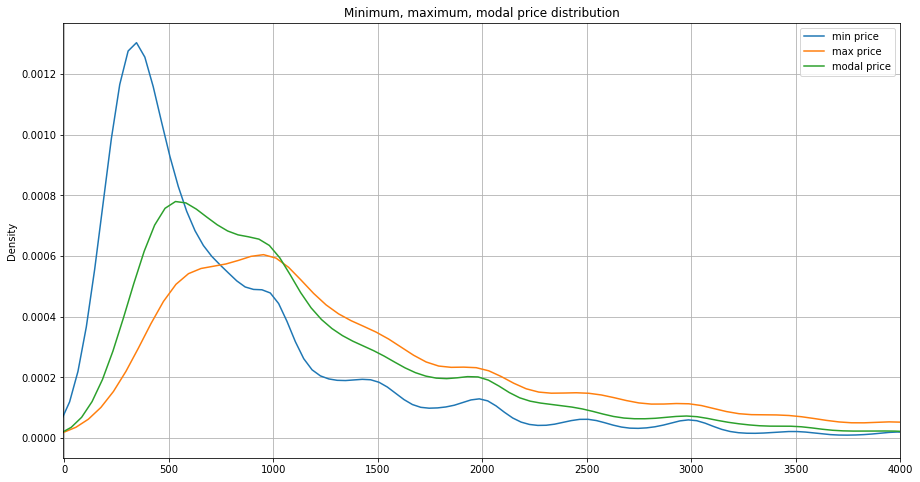

In [653]:
df['Min_Price'].plot(figsize=(15,8) , kind='kde', label = 'min price')
df['Max_Price'].plot(kind='kde' ,  label = 'max price')
df['Modal_Price'].plot(kind='kde',  label = 'modal price',)
plt.title('Minimum, maximum, modal price distribution')
plt.xlim([-5, 4000])
plt.grid()
plt.legend()
plt.show()

#### Observations:

*  Data has some outlies as values falls above 3 (2.5) sigma but for our analysis we can not ignore these values as there could be chances that tomamto price may hit higher values in case of metro cities/ higher demands-low supply/ farmer strikes / lower production, etc 


*  We need to consider outliers as they can give us momentary/occinal spikes. We find  1624, 3379, 2259 number of outliers in ma price, min price and modal price for total 35544 records. Outliers are lss than 10 percent of total dataset.




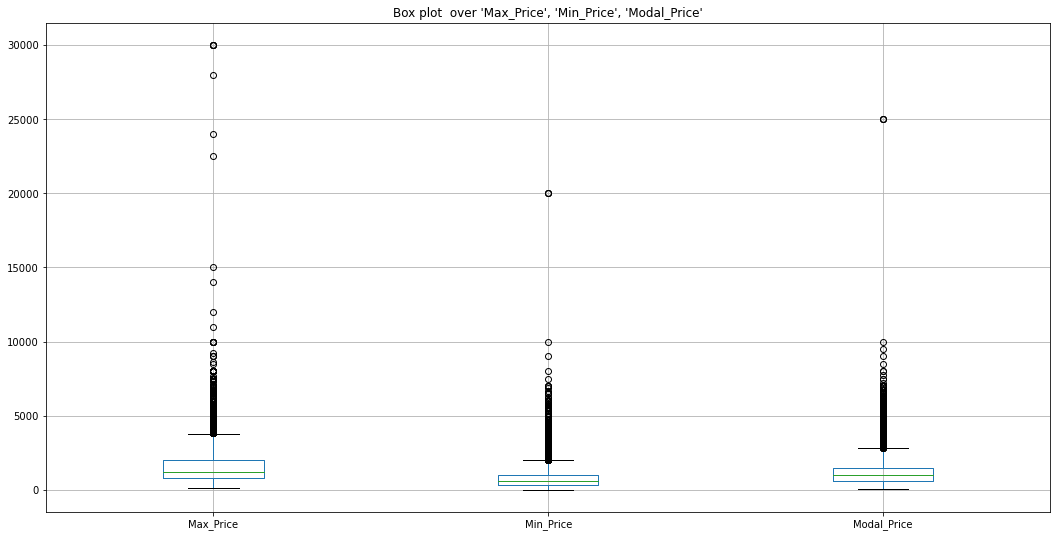

In [950]:
plt.figure(figsize =(18,9))
plt.title("Box plot  over 'Max_Price', 'Min_Price', 'Modal_Price'")
df.boxplot(column=['Max_Price', 'Min_Price', 'Modal_Price'])
plt.show()

In [1295]:
# Replacing the 'Mangalore(Dakshin Kannad)' value by 'Mangalore' for ease of handling data.

df[df.District_Name=='Mangalore(Dakshin Kannad)'].head(2)

,District_Name,Market_Name,Variety,Grade,Min_Price,Max_Price,Modal_Price
Price_Date,,,,,,,


In [1012]:
df.replace(to_replace ='Mangalore(Dakshin Kannad)', value = 'Mangalore', inplace=True)

In [1296]:
print(df[df.District_Name=='Mangalore(Dakshin Kannad)'].head(2))

Empty DataFrame
Columns: [District_Name, Market_Name, Variety, Grade, Min_Price, Max_Price, Modal_Price]
Index: []


In [1297]:
df[df.District_Name=='Mangalore'].head(3)

,District_Name,Market_Name,Variety,Grade,Min_Price,Max_Price,Modal_Price
Price_Date,,,,,,,
2020-04-21,Mangalore,Mangalore,Tomato,FAQ,1500,2000,1700
2020-04-22,Mangalore,Mangalore,Tomato,FAQ,1500,2000,1700
2020-04-23,Mangalore,Mangalore,Tomato,FAQ,1800,2200,2000


In [1015]:
for item in df.columns:
    print(f" \"{item}\" has below different values with count ".center(80, '*'))
    print(df[item].value_counts())
    print()

************ "District_Name" has below different values with count *************
Kolar               13623
Bangalore            7615
Chikmagalur          3296
Mysore               2852
Davangere            2052
Chamrajnagar         1542
Hassan               1147
Shimoga               835
Bellary               719
Mandya                639
Udupi                 393
Tumkur                229
Dharwad               170
Haveri                112
Belgaum                93
Mangalore              90
Chitradurga            72
Gadag                  58
Madikeri(Kodagu)        4
Raichur                 3
Name: District_Name, dtype: int64

************* "Market_Name" has below different values with count **************
Kolar                          2864
Mulabagilu                     2155
Chintamani                     2084
Srinivasapur                   2065
Channapatana                   1842
Ramanagara                     1828
Chickkaballapura               1757
Mysore (Bandipalya)            

In [660]:
print('Available districts to analysis ')
district = df.District_Name.unique()
list(district)

Available districts to analysis 


['Davangere',
 'Mandya',
 'Mysore',
 'Hassan',
 'Kolar',
 'Chikmagalur',
 'Bangalore',
 'Shimoga',
 'Chamrajnagar',
 'Bellary',
 'Chitradurga',
 'Udupi',
 'Tumkur',
 'Raichur',
 'Madikeri(Kodagu)',
 'Belgaum',
 'Gadag',
 'Haveri',
 'Dharwad',
 'Mangalore']

In [1301]:
df.nunique()
for col in df.columns[0:4]:
    print("Total unique values for \'{}\''  -- {}".format(col, df[col].nunique()))

Total unique values for 'District_Name''  -- 20
Total unique values for 'Market_Name''  -- 59
Total unique values for 'Variety''  -- 2
Total unique values for 'Grade''  -- 4


In [662]:
#Total records per district
print('Total number of records per district')
df.District_Name.value_counts()

#Kolar distict has maximum number records in dataset and Raichur has minimum number of records


Total number of records per district


Kolar               13623
Bangalore            7615
Chikmagalur          3296
Mysore               2852
Davangere            2052
Chamrajnagar         1542
Hassan               1147
Shimoga               835
Bellary               719
Mandya                639
Udupi                 393
Tumkur                229
Dharwad               170
Haveri                112
Belgaum                93
Mangalore              90
Chitradurga            72
Gadag                  58
Madikeri(Kodagu)        4
Raichur                 3
Name: District_Name, dtype: int64


#### Analysis of Markets per Districts

In [663]:
ser = df.groupby('District_Name')['Market_Name'].nunique()
sorted_dis = ser.sort_values( ascending=False)
sorted_dis

District_Name
Kolar               8
Hassan              6
Mysore              6
Bangalore           6
Chikmagalur         5
Mandya              3
Chamrajnagar        3
Madikeri(Kodagu)    2
Shimoga             2
Haveri              2
Tumkur              2
Dharwad             2
Davangere           2
Chitradurga         2
Bellary             2
Belgaum             2
Raichur             1
Mangalore           1
Gadag               1
Udupi               1
Name: Market_Name, dtype: int64

In [664]:
#To findout different markets in given district

all_market = {}
print('Markets per districts'.center(60,"-"))
print()
for dis in district:
    
    s = df[df.District_Name==dis]['Market_Name'].value_counts()

    market=[]
    l1 = list(s.index)
    l2 = list(s)

    for i in range(len(l2)):
        if l2[i]==0:
            break
        market.append(l1[i])
    all_market[dis] = market

for key, value in zip(all_market.keys(), all_market.values()):
    print("{} --> {}".format(key, value))

-------------------Markets per districts--------------------

Davangere --> ['Davangere', 'Honnali']
Mandya --> ['Nagamangala', 'K.R. Pet', 'Maddur']
Mysore --> ['Mysore (Bandipalya)', 'K.R.Nagar', 'T. Narasipura', 'Nanjangud', 'Hunsur', 'Santhesargur']
Hassan --> ['Hassan', 'Channarayapatna', 'Belur', 'Arasikere', 'Holenarsipura', 'Sakaleshpura']
Kolar --> ['Kolar', 'Mulabagilu', 'Chintamani', 'Srinivasapur', 'Chickkaballapura', 'Bangarpet', 'Malur', 'Gowribidanoor']
Chikmagalur --> ['Chikkamagalore', 'Bagepalli', 'Kadur', 'Tarikere', 'Koppa']
Bangalore --> ['Channapatana', 'Ramanagara', 'Doddaballa Pur', 'Binny Mill (F&V), Bangalore', 'Kanakapura', 'Hoskote']
Shimoga --> ['Shimoga', 'Thirthahalli']
Chamrajnagar --> ['Gundlupet', 'Chamaraj Nagar', 'Kollegal']
Bellary --> ['Hospet', 'Bellary']
Chitradurga --> ['Holalkere', 'Hiriyur']
Udupi --> ['Udupi']
Tumkur --> ['Tumkur', 'Tiptur']
Raichur --> ['Sindhanur']
Madikeri(Kodagu) --> ['Somvarpet', 'Gonikappal']
Belgaum --> ['Belgaum', 'Ku

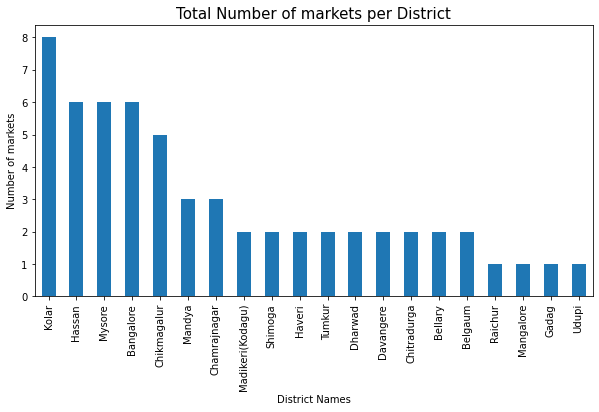

In [665]:
plt.figure(figsize=(10,5))
df.groupby('District_Name')['Market_Name'].nunique().sort_values( ascending=False).plot(kind='bar')

plt.xlabel('District Names', fontsize=10)
plt.ylabel('Number of markets', fontsize=10)
plt.title('Total Number of markets per District', fontsize=15)
plt.xticks(fontsize=10)
plt.show()

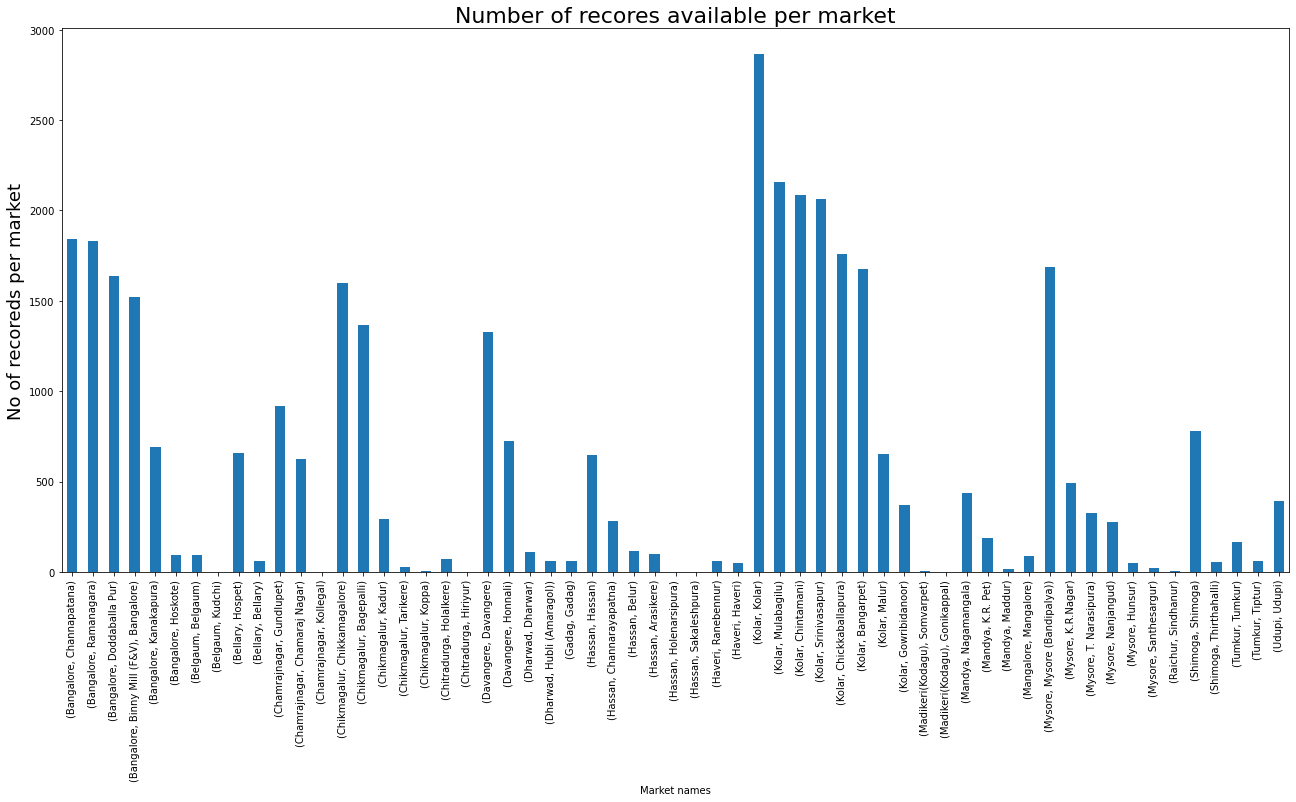

In [666]:
plt.figure(figsize=(22,10))
plt.title('Number of recores available per market', fontsize=22)
df.groupby('District_Name')['Market_Name'].value_counts().plot(kind='bar')
plt.xlabel('Market names')
plt.ylabel('No of recoreds per market', fontsize=18)
plt.show()

#From the graph , we can see that , theere more record available for Kolar districts.

#### Observations:


*  From above 2 graphs, we can see that Kolar district has more markets compared to other districts.


*  All the markets in Kolar districts has high mumber of records compared to other markets.


*  Madikeri(Kodagu), Haveri district's market has less number of records in it. 


*  There are few districts such as Udupi, Raichur, Mangalore, Gadag  which has single market.


*  Bangalore, Chikmanglalore districts market has high number of records followed by Kolar district.


*  Though Hassan district has more number of markets ie 6 but number of records per markets is very less.

#### Conclusions: 

*  Thought to correlate number of markets vs average modal price for district but some districts has lagre number of records  compared to other so could not draw a final conclusion.Hassan is failing for this criteria as even having more number of markets, it has low average modal value.



#### Analysis of prices of for all districts

In [667]:
df.groupby('District_Name').mean()

,Min_Price,Max_Price,Modal_Price
District_Name,,,
Bangalore,1202.386737,1667.820749,1436.250033
Belgaum,2875.268817,3747.311828,3393.548387
Bellary,595.869263,957.100139,737.098748
Chamrajnagar,825.437743,1117.318418,952.074578
Chikmagalur,1060.814017,1548.849211,1306.917779
Chitradurga,689.583333,882.180556,719.875000
Davangere,904.703216,1138.711014,1026.422515
Dharwad,1025.588235,1384.411765,1218.676471
Gadag,1894.827586,2993.965517,2634.482759


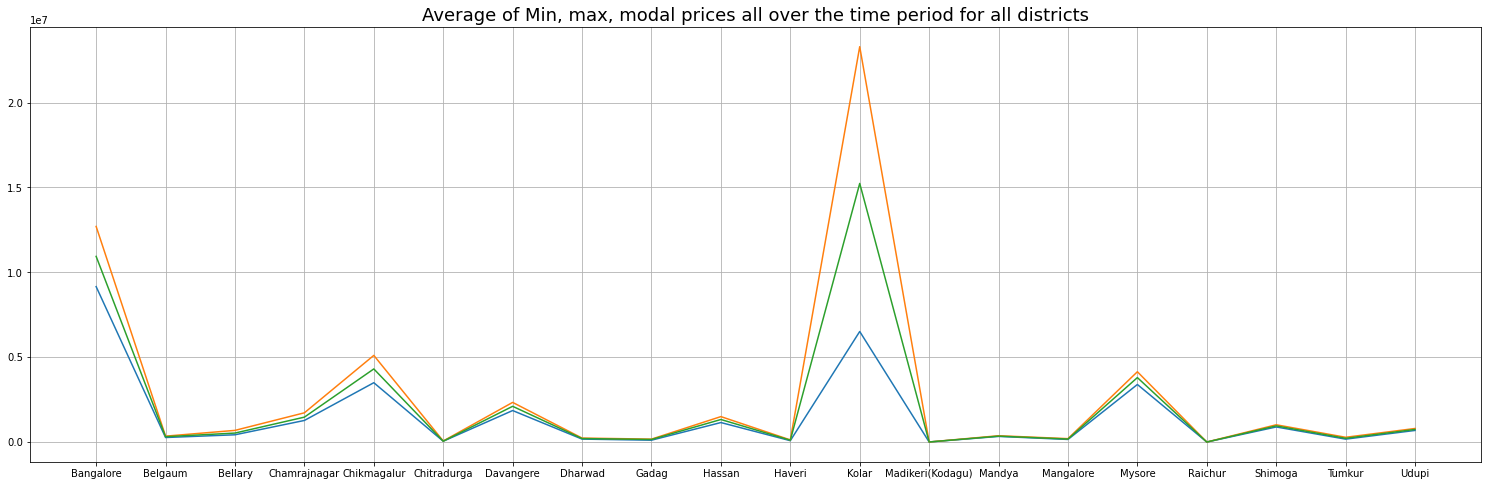

In [668]:
plt.figure(figsize=(26,8))
plt.plot(df.groupby('District_Name').sum())
#plt.xlabel(t, rotation='horizontal')
plt.title('Average of Min, max, modal prices all over the time period for all districts', fontsize=18)

plt.grid()
plt.show()


#Graph of  Aggregate of all prizes(min, max,modal) all over the time series for all districts

#### Observations:

 

*   Kolar district has highest modal prices among all districts. It might be due to  

    * High number of records which contains records of all seasons(very high demand) which is missing in other districts.
    
    * Export to nearby major cities (like Bangalore)
    
    * Production of best quality tomatos
    
    * Surrounded by cunsumer of high economical class
    



*  Tumkur, Mandya, Raichiur, Chitradurg, Bellary districts has low modal prices. It might be due to 

    * Low number of records which contains records of few seasons(less demanding).
    
    *  Low grade tomatos
    
    *  Production in high volume
   

#### Analysis of prices of over the time period

In [669]:
df.groupby(df.index).sum()

,Min_Price,Max_Price,Modal_Price
Price_Date,,,
2015-01-01,18142,29337,23698
2015-01-02,10033,16833,13900
2015-01-03,12368,20383,17564
2015-01-04,1740,4336,3075
2015-01-05,15814,24434,21176
...,...,...,...
2021-01-28,20156,33190,26667
2021-01-29,18678,31865,24921
2021-01-30,20405,34315,27210


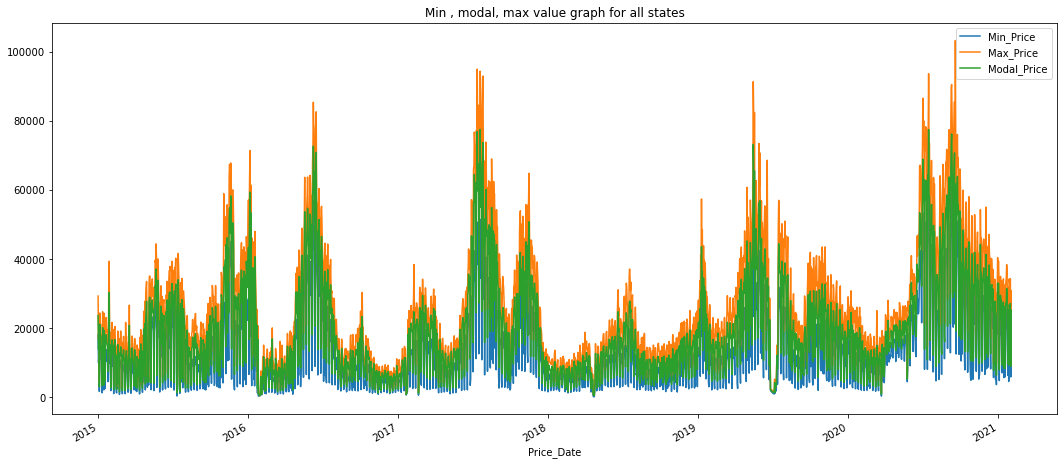

In [1302]:
df.groupby(df.index).sum().plot(figsize=(18,8))
plt.title('Min , modal, max value graph for all states')
plt.show()

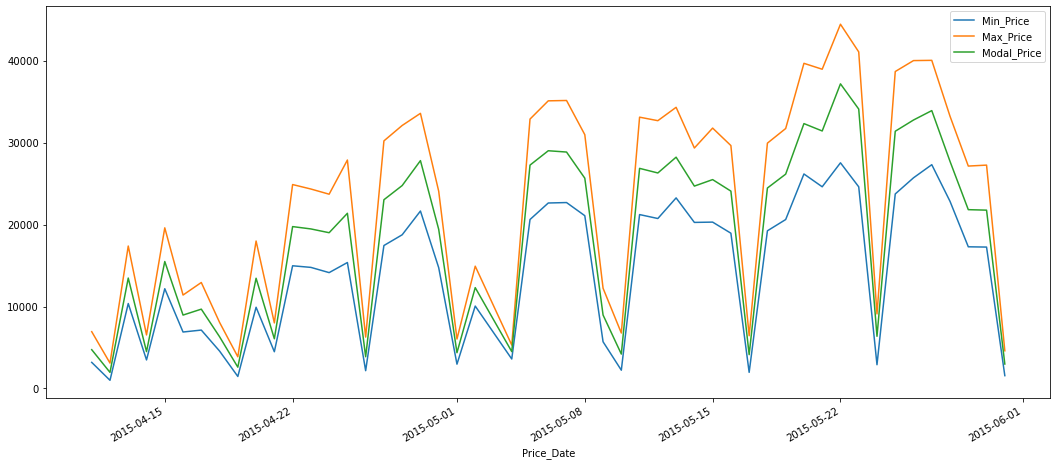

In [671]:
df.groupby(df.index).sum()[100:150].plot(figsize=(18,8))
plt.show()

#### Observations:


*  There is abrupt change in prices. It might be bacause of external factors like natural climaties, people strikes, supply demand chain, etc.


*  Collective time series for all districts is driven by time series of Kolar, Bangalore districts as these districts have high number of records.



FAQ grade has 34380 records
Medium grade has 1069 records
Large grade has 15 records
Small grade has 80 records


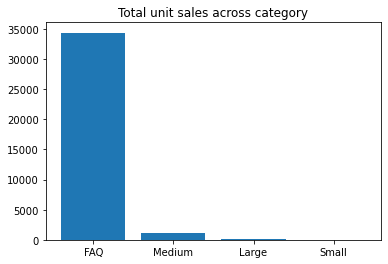

In [672]:
grad_lst = df.Grade.unique()
for i in grad_lst:
    print("{} grade has {} records".format(i,df[df['Grade']== i].shape[0]))
plt.bar(grad_lst, df.Grade.value_counts())
plt.title('Total unit sales across category')
plt.show()

Observations:


*   Tomatos with FAQ grade has more records.

*   Medium, Large, Small grade tomato has very less records.

<BarContainer object of 2 artists>

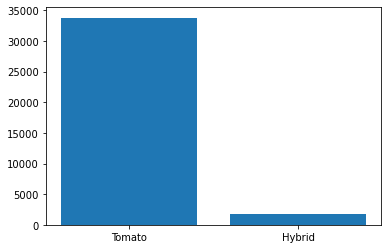

In [673]:
df.groupby('Variety').count()
plt.bar(df.Variety.unique(),df.Variety.value_counts())
#there is large gap between varieties of commodity

In [1279]:
#Function for finding the time frame for each district ie start date and end date of time series.

def district_timeframe(dis):

    output= []
    lst = ts_generation(dis)

    n_records= lst[1]
    index1 = lst[0].index[0].date()
    index2 = lst[0].index[-1].date()

    #print('District : {}   Records: {},  TimeFrame : {} to {} '.format(dis,n_records , index1, index2))
    output.append(n_records)
    output.append(index1)
    output.append(index2)
    
    return output 


timeframe = {}
for dis in district:
    
    timeframe[dis] = district_timeframe(dis)
    
    print('District : {0: <16}   Records: {1:<10}  TimeFrame : {2} - {3} '.format(dis ,timeframe[dis][0] , timeframe[dis][1], timeframe[dis][2]))
    #print(timeframe[dis])


District : Davangere          Records: 1474        TimeFrame : 2015-01-01 - 2021-01-30 
District : Mandya             Records: 612         TimeFrame : 2015-01-01 - 2021-01-01 
District : Mysore             Records: 1782        TimeFrame : 2015-01-01 - 2021-02-01 
District : Hassan             Records: 941         TimeFrame : 2015-01-01 - 2021-01-31 
District : Kolar              Records: 2194        TimeFrame : 2015-01-01 - 2021-02-01 
District : Chikmagalur        Records: 1695        TimeFrame : 2015-01-01 - 2021-02-01 
District : Bangalore          Records: 1911        TimeFrame : 2015-01-01 - 2021-02-01 
District : Shimoga            Records: 792         TimeFrame : 2015-01-01 - 2021-02-01 
District : Chamrajnagar       Records: 1065        TimeFrame : 2015-01-02 - 2021-02-01 
District : Bellary            Records: 679         TimeFrame : 2015-01-05 - 2021-02-01 
District : Chitradurga        Records: 72          TimeFrame : 2015-01-05 - 2020-04-03 
District : Udupi              Re

#### Observations:
 
*  Kolar distict has maximum number records(2194) in dataset and Raichur has minimum number of records(3). So state modal price is mostly driven by Kolar, Bangalore as these districts capture data of all seasons. 


*  14 districts has less than 1000 records over 5 years of time span. District with less number of records will not create more influence in time series of Karnataka state. Districts with less number of record will not help to predict accurate value.



* Time seris like Kolar districts have captured data for all the seasons(high, low, average) of Tomato over the 5 years.
TimeFrame : 2015-01-01 - 2021-02-01


* Raichur, Madikeri, Gadag, Manglore, Chitradurg district presence is negligible. (No of records < 100) 


* Time series for all districts are non uniform as number of records are less than 2224(1-jan-2015 to 01-Feb-2021).


* It will be appropriate to predict value using dominant district. So Onwards will analyse only time series for Bangalore.


## Analysis of  Bangalore district data

In [677]:
#Function for time series generation for specific district

#It provides total number of  records, markets, market name list and time time series for a given districts 

def ts_generation(dist):
    
    #Total number of records available for given district
    no_records = df[df.District_Name==dist].groupby('Price_Date').mean()['Modal_Price'].count()
    #print(no_records)
    
    #Total number of markets avaialble for given district
    no_markets = df[df.District_Name==dist]['Market_Name'].nunique()
    #print(no_markets)
    
    #Different markets in given district
    s = df[df.District_Name==dist]['Market_Name'].value_counts()
    market=[]
    l1 = list(s.index)
    l2 = list(s)

    for i in range(len(l2)):
        if l2[i]==0:
            break
        market.append(l1[i])
    market_lst = market
    
    
    #Time series for Modal price for given district
    temp_df = df[df.District_Name==dist]
    ts = temp_df.groupby('Price_Date').mean()['Modal_Price']
    
    
    return [ts, no_records, no_markets, market_lst]

ts, no_records, no_markets, market_lst = ts_generation('Bangalore')

print("Total No of records : ", no_records)
print("Total no of markets : ", no_markets)
print("Markets : ", market_lst)
ts_blr = ts

Total No of records :  1911
Total no of markets :  6
Markets :  ['Channapatana', 'Ramanagara', 'Doddaballa Pur', 'Binny Mill (F&V), Bangalore', 'Kanakapura', 'Hoskote']


In [678]:
ts_blr

Price_Date
2015-01-01    1175.0
2015-01-02    1170.0
2015-01-03    1125.0
2015-01-05    1140.0
2015-01-06    1125.0
               ...  
2021-01-27    1130.0
2021-01-28    1140.0
2021-01-29    1125.0
2021-01-30    1300.0
2021-02-01    1220.0
Name: Modal_Price, Length: 1911, dtype: float64

In [1304]:
print('Entries are available From {} To {}'.format(df.index[0].date(), df.index[-1].date()))

print(ts.shape[0])

Entries are available From 2015-01-01 To 2021-02-01
1911


#### Uniform Time series ?

* Lack of continuous information makes time series non-uniform


* Non uniform time series gives psudo patterns/trends which leads to incorrect predictions.


* For Bangalore Time series, entries are available from 2015-01-01 To  2021-02-01. So total entries should be approx (365*6 +31) = 2221 But  1911 enteries are available. So we need to make this time series uniform.


#### Action: Imputation

* Created new entries for missing values and imputed those reords with forward filling method.




In [680]:
#convert the time series frequency of the given data to the specified frequency

ts_blr = ts_blr.asfreq('D', method='ffill') 

ts_blr.shape[0]

2224

#### Stationarity of time series


*   To use statistical model in time series, we need to make time series stationary so that its  statistical properties ie mean, varience, etc remains constant over the time.


*   Prediction made from stationary time series can be modelled accurately.


*   Stationarity of time seies is checked using ADF, KPSS statistical tests, using graphical representation.


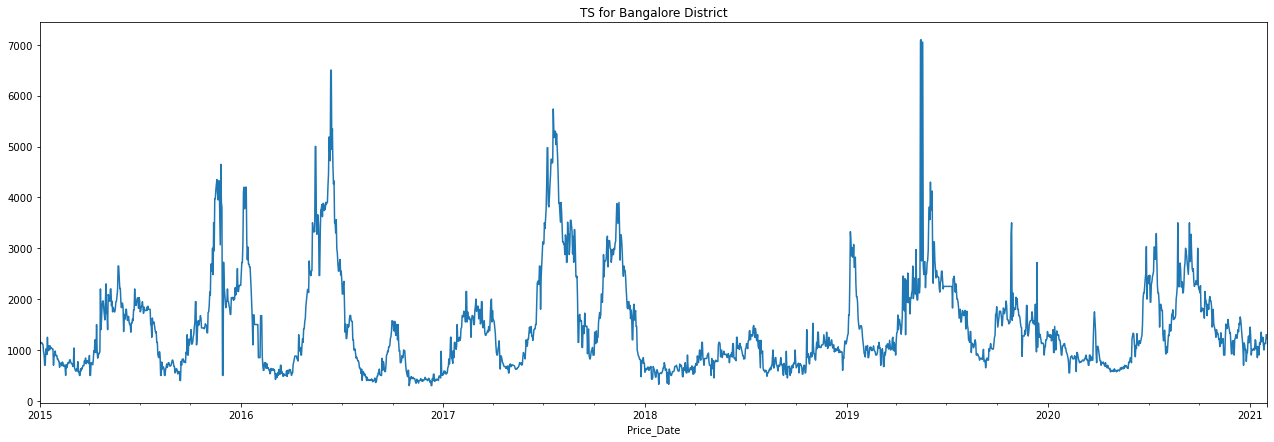

In [681]:
ts_blr.plot(figsize=(22,7))
plt.title('TS for Bangalore District')
plt.show()


In [682]:
#Description of statstical properties of bangalore series.

ts_blr.describe()

count    2224.00000
mean     1439.65898
std       951.52887
min       300.00000
25%       750.00000
50%      1150.00000
75%      1800.00000
max      7100.00000
Name: Modal_Price, dtype: float64

Text(0.5, 1.0, 'Distribution of Modal price For Bangalore district')

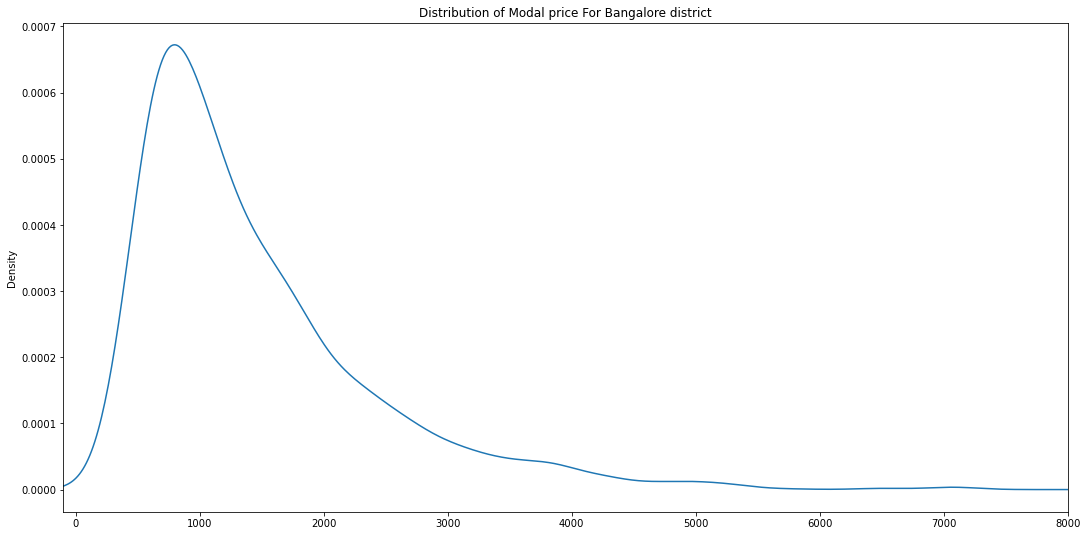

In [683]:
plt.figure(figsize=(18,9))

ts_blr.plot(kind='kde')
plt.xlim([-100, 8000]) #as max value is 7100.00000 from describe() function
plt.title('Distribution of Modal price For Bangalore district')

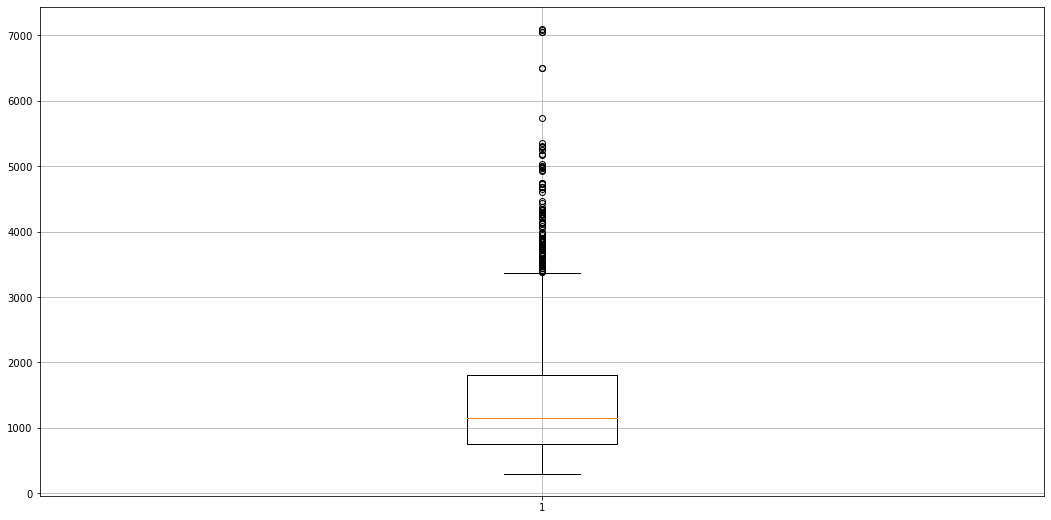

In [684]:
plt.figure(figsize=(18,9))
plt.grid()
plt.boxplot(ts_blr)
plt.show() 


Observations:

*  Mean value is grater than median value which is represented by 50%(50th percentile). It shows data is right skewed. 


*  There is notably a large difference between 75th %tile and max values of series. Thus it suggests that there are extreme values-Outliers in Bangalore data set.


*  From probability distribution graph as well, we can see that, modal prices for bangalore district is skewed one.



#### Seasonal decompose of Time series


*  The trend component captures the low frequency component of time series which gives magnitude component of time series.


*  The seasonal component is given by high frequency component of time series which gives repeating patterns occuring.


*  Non-systematic component of time series is called residuals


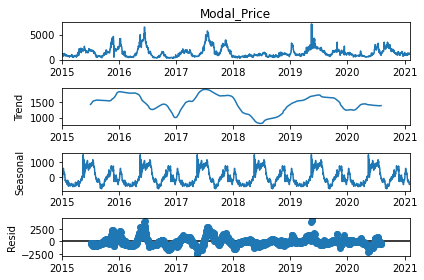

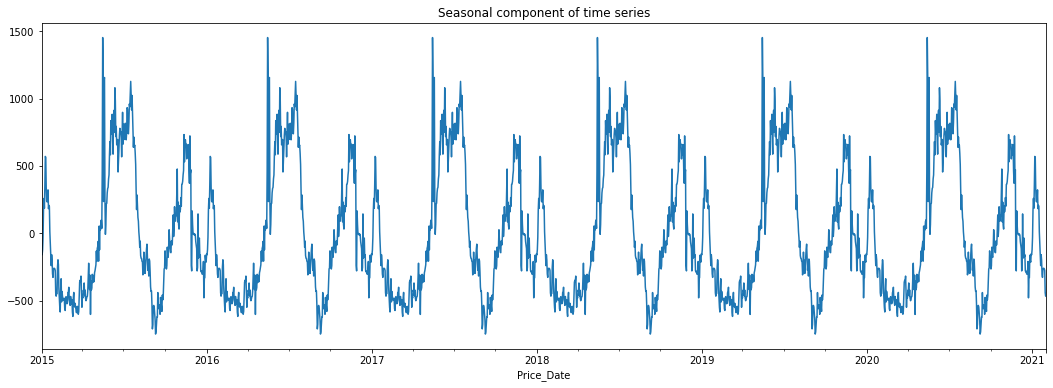

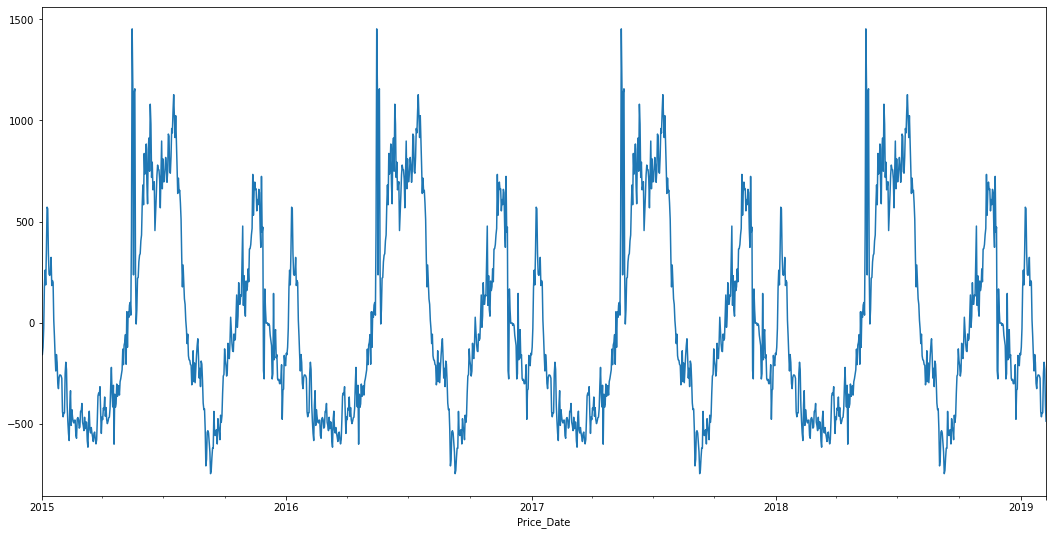

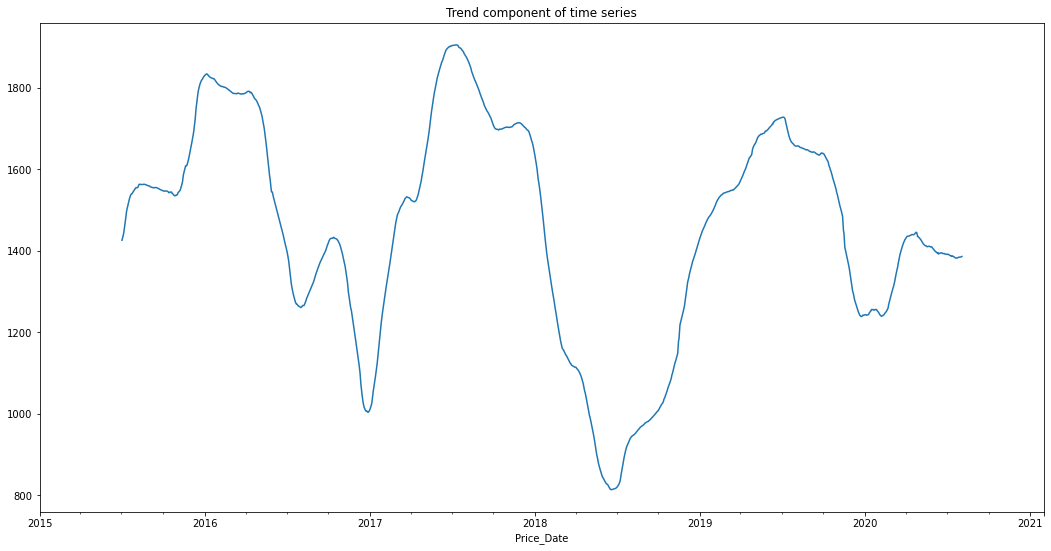

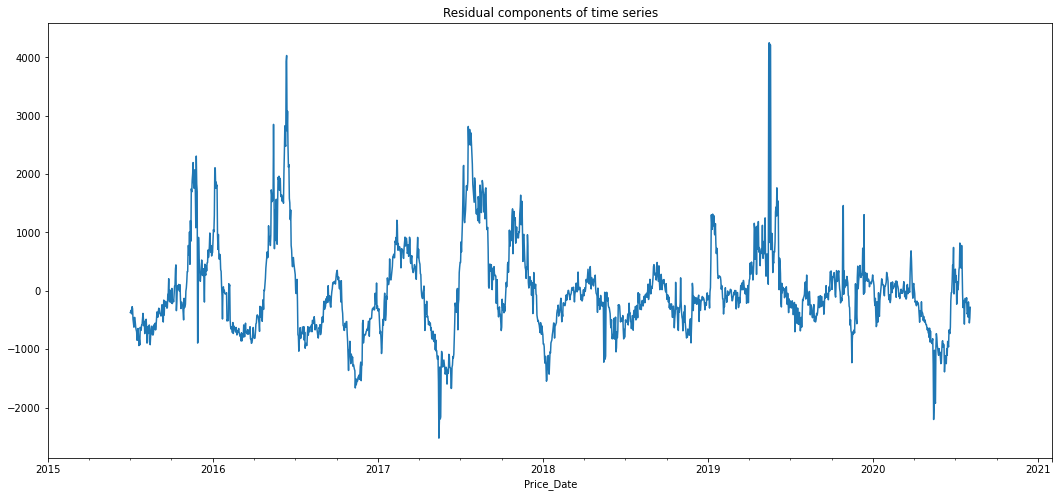

In [685]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(ts_blr,  model='additive', freq = 365)
result.plot()
plt.show()

result.seasonal.plot(figsize=(18,6))#figsize=(15,10)
plt.title('Seasonal component of time series')
plt.show()

result.seasonal[0:1500].plot(figsize=(18,9))
plt.show()

result.trend.plot(figsize=(18,9))
plt.title('Trend component of time series')
plt.show()

result.resid.plot(figsize=(18,8))
plt.title('Residual components of time series')
plt.show()


#### Observations:


*  Trend is non linear which comprises increasing and decreasing patterns. 


*  Trend-cycle component exhibits non period pattern which cyclic in nature. Bangalore has cyclic pattern.

 
 
*  In Seasonal component graph, we can see some perfect period patterns. It might be due to production seasons of tomatos. 


*  A seasonal pattern that remains stable over time does not make the series non-stationary. A non-stable seasonal pattern, will make the data non-stationary. For Bangalore time series, there is strong seasonal pattern exists.


* From the time series component graphs, Time series is non stationary.


#### Stationarity test: ADF, KPSS

*   ADF test -- ADF test is used to determine the presence of stationarity in the series and hence helps to understand stationarity of time series.

    p-value > 0.05 Non stationary, p-value < 0.05 Stationary
    
    
*   KPSS test -- KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.
    
    p-value > 0.05 Stationary, p-value < 0.05 Non stationary

In [686]:
from statsmodels.tsa.stattools import adfuller, kpss

result = adfuller(ts_blr)

print('ADF Test Statics: %f'%result[0])
print('p value: %f'%result[1])
print('Critical values:')
for key, value  in  result[4].items():
  print('{} : {}'.format(key , value))

if result[0]< result[4]['5%']:
  print('ADF Test: Time series is stationary')
else:
  print('ADF Test : Time series is not stationary')

print()

result = kpss(ts_blr)

print('KPSS Test Statics: %f'%result[0])
print('p value: %f'%result[1])
print('Critical values:')
for key, value  in  result[3].items():
  print('{} : {}'.format(key , value))
print()
if result[0]> result[3]['5%']:
  print('KPSS Test : Time series is non stationary')
else:
  print('KPSS Test: Time series is  stationary')

ADF Test Statics: -5.401514
p value: 0.000003
Critical values:
1% : -3.4333191288144413
5% : -2.8628516682161713
10% : -2.567468264817643
ADF Test: Time series is stationary

KPSS Test Statics: 0.072264
p value: 0.100000
Critical values:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739

KPSS Test: Time series is  stationary


#### Observations:


*  Statistical test shows time series is stationary.


*  Graphs(seasonal component) shows time series is stationary


*  We can use statistical model directly on bangalore time series.


#### Train - Test - Validation split


*  For validation of model skill on training set, validation set is kept aside.


*  Random sampling will not be applicable to time series due time factor.


*  Prediction over long horizon for out-of-sample of train-test split will result in accumulation of errors.


*   Keeping the split point to 0.8 of the whole dataset, we are making sure that decreasing trend at the end of 2019 should get capture.

In [751]:
split_point=0.85

blr_train = ts_blr[0:int(split_point* ts_blr.shape[0])]
blr_test = ts_blr[int(split_point* ts_blr.shape[0]): ]

print(blr_train.shape, blr_test.shape)


(1890,) (334,)


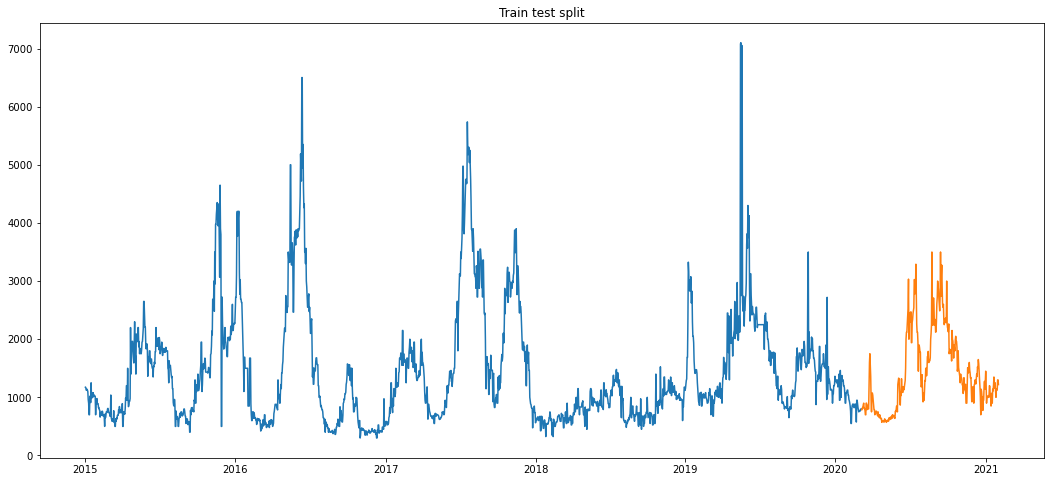

In [755]:
plt.figure(figsize=(18, 8))
plt.plot(blr_train, label='Train data')
plt.plot(blr_test, label='Test data')
plt.title('Train test split')
plt.show()

#### Prediction of Time series

1: Naive methods -- extremely statistic based univariate modelling techniques that can be used as benchmarks to
        compare more sophisticated models. Not good to consider. (avergae method, naive method)
        
2: ARIMA and its varients, ExpoentialSmoothing Models --  All these are statistical models. Need time series to be stationary.
        Good for single step-ahead prediction and works well for univariate time series only.
        
3: ML Model: ML models are best fit for multistep ahed prediction and multivariate time series analysis.


#### Exogeneous Variables


* The independent variables can be added to an ARIMA model to help model in prediction.


* If we consider exogeneous variable in prediction of ARIMA model, it becomes Auto-regressive integrated moving average model with exogenous variables (ARIMAX)


* Before we introduce exogeneous variable in model, we need to perform correlation analysis between them. Correlation analysis measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship.


* The Pearson correlation evaluates the linear relationship between two continuous variables.


* Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables.

In [795]:
min_ = df[df['District_Name']=='Bangalore'].groupby('Price_Date').mean().asfreq('D', method= 'ffill')["Min_Price"]
max_ = df[df['District_Name']=='Bangalore'].groupby('Price_Date').mean().asfreq('D', method= 'ffill')["Max_Price"]
modal_ = df[df['District_Name']=='Bangalore'].groupby('Price_Date').mean().asfreq('D', method= 'ffill')["Modal_Price"]

In [796]:
from scipy.stats import pearsonr, spearmanr

corr, p = spearmanr(min_, modal__)
print (corr, p)

corr, p = spearmanr(max__, modal__)
print (corr, p)

0.9945207696322996 0.0
0.9945081357865561 0.0


#### Observations:

* Out of all attributes ie Market name, grade, variety, max price, min price, only min and max price helps in modal prediction. 


* There is a strong relationship between modal price - max price and  modal price - min price.


* Thses variables can be used as exogeneous variables while modelling the data.

In [797]:
min_train = min_[0:int(split_point* ts_blr.shape[0])]
min_test = min_[int(split_point* ts_blr.shape[0]): ]

max_train = max_[0:int(split_point* ts_blr.shape[0])]
max_test = max_[int(split_point* ts_blr.shape[0]): ]

blr_train =modal_[0:int(split_point* ts_blr.shape[0])]
blr_test = modal_[int(split_point* ts_blr.shape[0]): ]
print(min_train.shape, max_train.shape, min_test.shape, max_test.shape,)
print(blr_train.shape, blr_test.shape)

(1890,) (1890,) (334,) (334,)
(1890,) (334,)


In [803]:
min_train = min_train.astype(float).replace([np.inf, -np.inf],np.nan)
max_train = max_train.astype(float).replace([np.inf, -np.inf],np.nan)
blr_train = blr_train.astype(float).replace([np.inf, -np.inf],np.nan)

In [805]:
print(blr_train.shape, min_train.shape, max_train.shape)

(1890,) (1890,) (1890,)



* Auto-correlation and partial auto-correlation functions describes that a time series is linearly related to a lagged version of itself.


* summarize the strength of a relationship with an observation in a time series with observations at prior time steps.



AUTOCORRELATION AND PARTIAL AUTOCORRELATION OF TIME SERIES


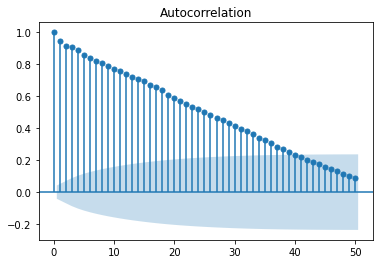

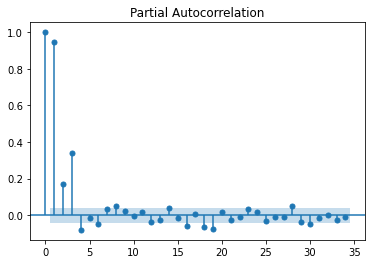

In [745]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print('AUTOCORRELATION AND PARTIAL AUTOCORRELATION OF TIME SERIES')
plot_acf(ts_blr, lags = 50)
plt.show()

plot_pacf(ts_blr)
plt.show()


In [798]:
max_train.shape

(1890,)

#### ARIMA and its varients:

* A popular and widely used statistical method for time series forecasting. 


* AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.


* I: Integrated. The use of differencing of raw observations if time series is not stationary.


* MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


In [816]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

ARIMA_model = ARIMA(blr_train, order=(3,0,1))
ARIMA_model = ARIMA_model.fit()

print(ARIMA_model.summary())

                              ARMA Model Results                              
Dep. Variable:            Modal_Price   No. Observations:                 1890
Model:                     ARMA(3, 1)   Log Likelihood              -13454.340
Method:                       css-mle   S.D. of innovations            298.583
Date:                Sun, 21 Mar 2021   AIC                          26920.680
Time:                        23:06:07   BIC                          26953.946
Sample:                    01-01-2015   HQIC                         26932.929
                         - 03-04-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1418.0715    208.547      6.800      0.000    1009.327    1826.816
ar.L1.Modal_Price     0.5245      0.058      9.040      0.000       0.411       0.638
ar.L2.Modal_Price     0.

RMSE using AUTOARIMA:  641.0854252392387


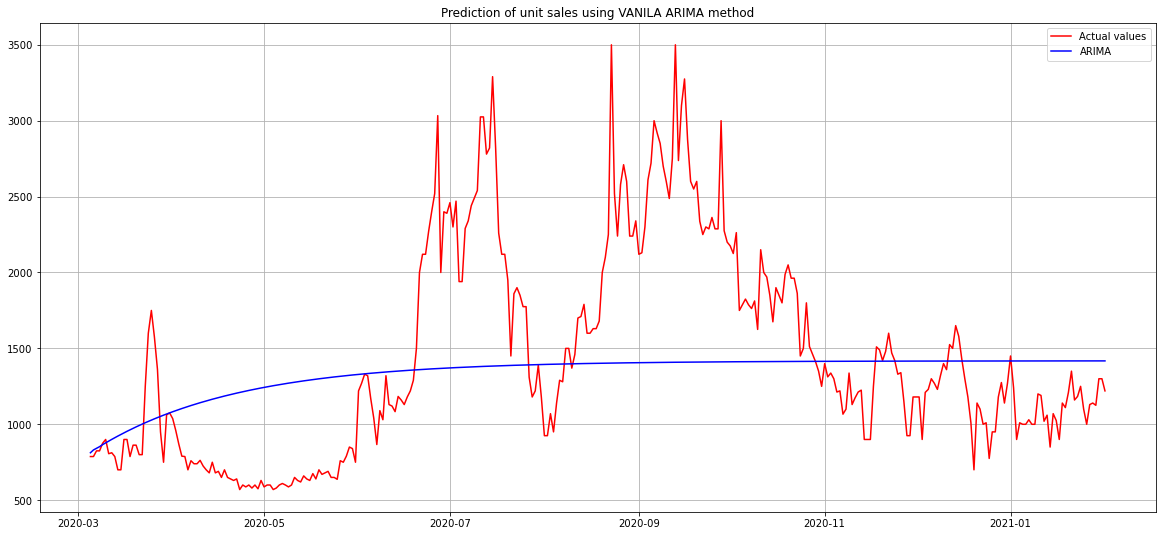

In [817]:
validation_arima = pd.DataFrame(blr_test.values, columns=['Actual'], index= blr_test.index)
validation_arima.shape


# Perform out-of-sample predictions for the entire test data

horizon = len(blr_test)
forecast = ARIMA_model.predict(start=blr_train.shape[0], end = blr_train.shape[0]+ (blr_test.shape[0]-1))
forecast
validation_arima['ARIMA'] = forecast.values

print('RMSE using AUTOARIMA: ', (math.sqrt(mean_squared_error(validation_arima.Actual, validation_arima.ARIMA))))

plt.figure(figsize = (20,9))
plt.plot(validation_arima.Actual, color= 'r', label='Actual values')

plt.plot(validation_arima.ARIMA, color = 'b', label = 'ARIMA')

plt.title('Prediction of unit sales using VANILA ARIMA method')
plt.grid()
plt.legend()
plt.show()

#### Grapth observation: 

* A problem with ARIMA is that it does not support seasonal data. ARIMA predicted values does not much correlated with actual values. RMSE is large in this case.

#### Seasonal ARIMA


* This is an extension of ARIMA model to deal with seasonal data which models the trend component and seasonal component of the time-series separately.


* It is characterized by 7 parameters, for non-seasonal part (p,d,q) parameters (same as for ARIMA model) and for seasonal part (P,D,Q,m) parameters where ‘m’ is the number of seasonal periods and P,D,Q are similar to parameters of ARIMA model.


In [832]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMA = SARIMAX(blr_train, order=(3,0,1), seasonal_order=(1,1,1,7), exogs=[min_train, max_train])
SARIMA = SARIMA.fit()

print(SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                       Modal_Price   No. Observations:                 1890
Model:             SARIMAX(3, 0, 1)x(1, 1, 1, 7)   Log Likelihood              -13427.710
Date:                           Sun, 21 Mar 2021   AIC                          26869.421
Time:                                   23:20:59   BIC                          26908.205
Sample:                               01-01-2015   HQIC                         26883.705
                                    - 03-04-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5777      0.019     30.712      0.000       0.541       0.615
ar.L2          0.0287      0.017      1.649

RMSE using SARIMA:  942.3275934408352


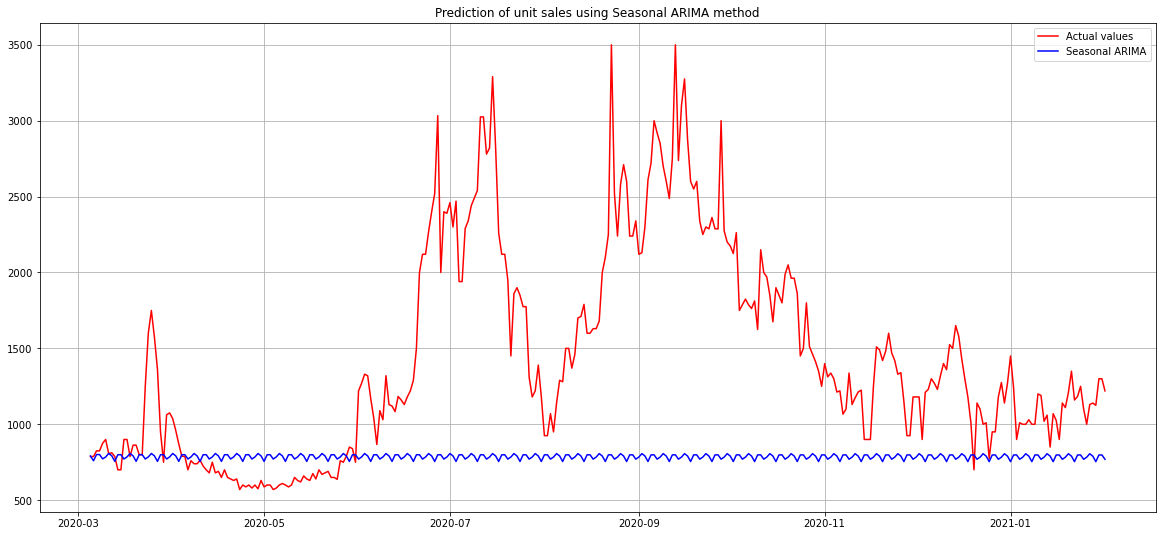

In [833]:
# Perform out-of-sample predictions for the entire test data

horizon = len(blr_test)
forecast = SARIMA.predict(start=blr_train.shape[0], end = blr_train.shape[0]+ (blr_test.shape[0]-1))
forecast
validation_arima['SARIMA'] = forecast.values

print('RMSE using SARIMA: ', (math.sqrt(mean_squared_error(validation_arima.Actual, validation_arima.SARIMA))))

plt.figure(figsize = (20,9))
plt.plot(validation_arima.Actual, color= 'r', label='Actual values')

plt.plot(validation_arima.SARIMA, color = 'b', label = 'Seasonal ARIMA')

plt.title('Prediction of unit sales using Seasonal ARIMA method')
plt.grid()
plt.legend()
plt.show()

####  Grapth Obervation: 

*  It gives more accuracy at the initial points but as time progresses , Prectidted grapth unable to follows actual magnitual component. Only improved the seasonal component by mimicing seasonality.


* We can see for very large prediction horizon the model is not able to keep on predicting and is just giving an average value.



#### Auto ARIMA   

* tried to imprve prediction using hyper parameters p , q ,d , P, Q, D , m provided by auto ARIMA. 


* we will use auto arima, where given a range of values, the model parameters are configured for us based on lower AIC and BIC values.

In [840]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
auto_arima = auto_arima(blr_train, start_p=1, d=1, start_q=1, max_p=12, max_d=2, max_q=6, start_P=1, D=None, start_Q=1, max_P=10, max_D=1, max_Q=10, max_order=5, m=7, seasonal=True,
                         stationary=True, information_criterion='bic', alpha=0.05, trace=True)

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : BIC=27138.848, Time=1.75 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : BIC=31458.373, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : BIC=27251.069, Time=0.60 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : BIC=28936.812, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[7]             : BIC=33593.922, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : BIC=27132.923, Time=1.22 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : BIC=27126.249, Time=0.76 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : BIC=27132.621, Time=1.84 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : BIC=29548.914, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : BIC=27243.605, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : BIC=27234.249, Time=1.17 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : BIC=27043.449, Time=0.93 sec
 ARIMA(1,0,2)(1,0,0)[7] intercept   : BIC=27050.171, Time=2.20 sec
 ARIMA(1,0,2)(0,0,1)[7] intercept   : BIC=27050.322, Time=1.72 sec
 ARIMA(1,0,2)(1,0,1

* As it throwed best parameters, we will use those to make the mdoel.
* Best model:  ARIMA(2,1,1)(0,0,0)[7] 

In [841]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1890
Model:               SARIMAX(4, 0, 0)   Log Likelihood              -13454.034
Date:                Sun, 21 Mar 2021   AIC                          26920.068
Time:                        23:25:20   BIC                          26953.334
Sample:                             0   HQIC                         26932.317
                               - 1890                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     46.0455     18.008      2.557      0.011      10.751      81.340
ar.L1          0.7543      0.009     86.836      0.000       0.737       0.771
ar.L2         -0.1115      0.008    -13.626      0.000      -0.128      -0.095
ar.L3          0.4090      0.007     57.213      0.000       0.395       0.423
ar.L4         -0.0843      0.007    -11.655      0.000      -0.099      -0.070
sigma2      8.931e+04    583.595    153.027      0.000    8.82e+04    9.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            285658.52
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        63.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE using AUTOARIMA:  642.0816871378695


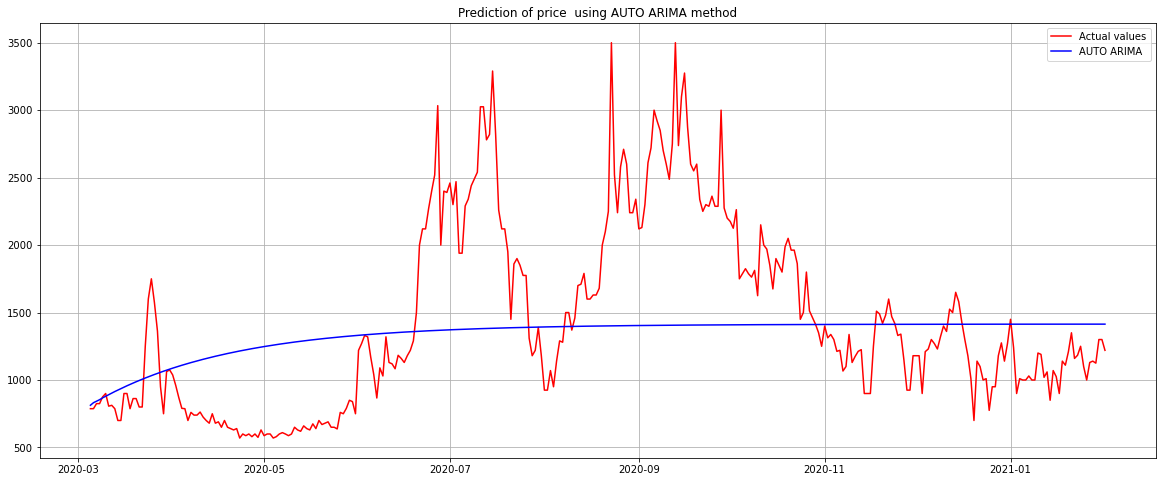

In [842]:
# Perform out-of-sample predictions for the entire test data
forecast_auto = auto_arima.predict(n_periods=334)
validation_arima['AUTO_ARIMA'] = forecast_auto

print('RMSE using AUTOARIMA: ', (math.sqrt(mean_squared_error(validation_arima.Actual,validation_arima.AUTO_ARIMA))))

plt.figure(figsize = (20,8))
plt.plot(validation_arima.Actual, color= 'r', label='Actual values')

plt.plot(validation_arima.AUTO_ARIMA, color = 'b', label = 'AUTO ARIMA')
#plt.plot(validation_arima.ARIMA, color = 'b', label = ' ARIMA')
plt.title('Prediction of price  using AUTO ARIMA method')
plt.grid()
plt.legend()
plt.show()

#### Observations: 

* Model given by autoarima ie ARIMA(2,1,1)(0,0,0)[7] does not involve seasonal part(P, Q,D = 0) therefore it is giving same result as vanilla arima. 


* To improve predictabilty of model for ;onger range,Need to feed recent availble data. One way to do this is WALK FORWARD VALIDATION.

#### Walk Foraward Validation on seasonal ARIMA with exogeneous variables

In [849]:
#Adding Exogeneous variables while doing seasonal arima
validation_arima['Min_Price']= min_test
validation_arima['Max_Price']= max_test

In [853]:
#Prediction using WFV on ARIMA method
import warnings
warnings.filterwarnings(action='ignore')

validation_arima['WFV_ARIMA'] = [0]* len(validation_arima.Actual)

x_train = blr_train.values
#min_train = min_train.values
#max_train = max_train.values

lst =[]

for i in range(len(validation_arima.Actual)):
    #print(validation_arima.Actual.iloc[i])
    
    ARIMA_WFV = SARIMAX(x_train, order=(3,0,1), seasonal_order=(1,1,1,7), exogs=[min_train, max_train] ).fit()
    
    v = ARIMA_WFV.forecast()[0]
    
    print('length of training set : {}, predicted: {} , actual: {} '.format(len(x_train), v, validation_arima['Actual'].iloc[i]))
    lst.append(v)

    x_train = np.append(x_train, validation_arima.Actual[i])
    min_train = np.append(min_train, validation_arima.Min_Price[i])
    max_train = np.append(max_train, validation_arima.Max_Price[i])


length of training set : 1890, predicted: 791.5981566406218 , actual: 787.5 
length of training set : 1891, predicted: 756.5436517724607 , actual: 787.5 
length of training set : 1892, predicted: 822.4205907653773 , actual: 825.0 
length of training set : 1893, predicted: 814.1600353158886 , actual: 825.0 
length of training set : 1894, predicted: 800.0326308138916 , actual: 875.0 
length of training set : 1895, predicted: 867.5364680049736 , actual: 900.0 
length of training set : 1896, predicted: 893.1607015307474 , actual: 806.25 
length of training set : 1897, predicted: 819.380372389873 , actual: 812.5 
length of training set : 1898, predicted: 810.0547329209546 , actual: 787.5 
length of training set : 1899, predicted: 813.0934525975692 , actual: 700.0 
length of training set : 1900, predicted: 730.0566861387549 , actual: 700.0 
length of training set : 1901, predicted: 713.9494865803485 , actual: 900.0 
length of training set : 1902, predicted: 848.9053298341232 , actual: 900.0 

length of training set : 1996, predicted: 1153.759730169881 , actual: 1290.0 
length of training set : 1997, predicted: 1293.6695360809038 , actual: 1500.0 
length of training set : 1998, predicted: 1419.2152090098184 , actual: 2000.0 
length of training set : 1999, predicted: 1807.6154786272123 , actual: 2120.0 
length of training set : 2000, predicted: 1938.3252683875203 , actual: 2120.0 
length of training set : 2001, predicted: 2126.5264322404983 , actual: 2270.0 
length of training set : 2002, predicted: 2229.5931115390513 , actual: 2400.0 
length of training set : 2003, predicted: 2276.904665356574 , actual: 2520.0 
length of training set : 2004, predicted: 2469.508630178825 , actual: 3033.3333333333335 
length of training set : 2005, predicted: 2849.0119506910733 , actual: 2000.0 
length of training set : 2006, predicted: 2048.51474627451 , actual: 2400.0 
length of training set : 2007, predicted: 2690.717447337872 , actual: 2390.0 
length of training set : 2008, predicted: 2193

length of training set : 2101, predicted: 2117.3381873760495 , actual: 2125.0 
length of training set : 2102, predicted: 2175.880371022157 , actual: 2262.5 
length of training set : 2103, predicted: 2246.144364124088 , actual: 1750.0 
length of training set : 2104, predicted: 1776.7286288126506 , actual: 1787.5 
length of training set : 2105, predicted: 1991.3757325105928 , actual: 1825.0 
length of training set : 2106, predicted: 1793.6654670724233 , actual: 1787.5 
length of training set : 2107, predicted: 1804.1948382185215 , actual: 1762.5 
length of training set : 2108, predicted: 1750.8148268390364 , actual: 1812.5 
length of training set : 2109, predicted: 1823.930719868235 , actual: 1625.0 
length of training set : 2110, predicted: 1678.1735611160007 , actual: 2150.0 
length of training set : 2111, predicted: 2082.8241074778266 , actual: 2000.0 
length of training set : 2112, predicted: 1854.412774077723 , actual: 1970.0 
length of training set : 2113, predicted: 2082.826857144

length of training set : 2206, predicted: 846.2779434066939 , actual: 1070.0 
length of training set : 2207, predicted: 1109.8900414999503 , actual: 1025.0 
length of training set : 2208, predicted: 940.2027635003262 , actual: 900.0 
length of training set : 2209, predicted: 952.6469079234628 , actual: 1140.0 
length of training set : 2210, predicted: 1127.5097442554952 , actual: 1110.0 
length of training set : 2211, predicted: 1052.7200051181262 , actual: 1210.0 
length of training set : 2212, predicted: 1217.8221275573535 , actual: 1350.0 
length of training set : 2213, predicted: 1237.0872335809331 , actual: 1160.0 
length of training set : 2214, predicted: 1185.5300200549298 , actual: 1183.3333333333333 
length of training set : 2215, predicted: 1252.9299119635648 , actual: 1250.0 
length of training set : 2216, predicted: 1199.1078911746765 , actual: 1100.0 
length of training set : 2217, predicted: 1119.5879472666268 , actual: 1000.0 
length of training set : 2218, predicted: 10

In [856]:
validation_arima['WFV_SARIMA'] = lst
print('RMSE USING arma MODEL: ',(math.sqrt(mean_squared_error(validation_arima.Actual,validation_arima.WFV_SARIMA))))

RMSE USING arma MODEL:  212.8090392560139


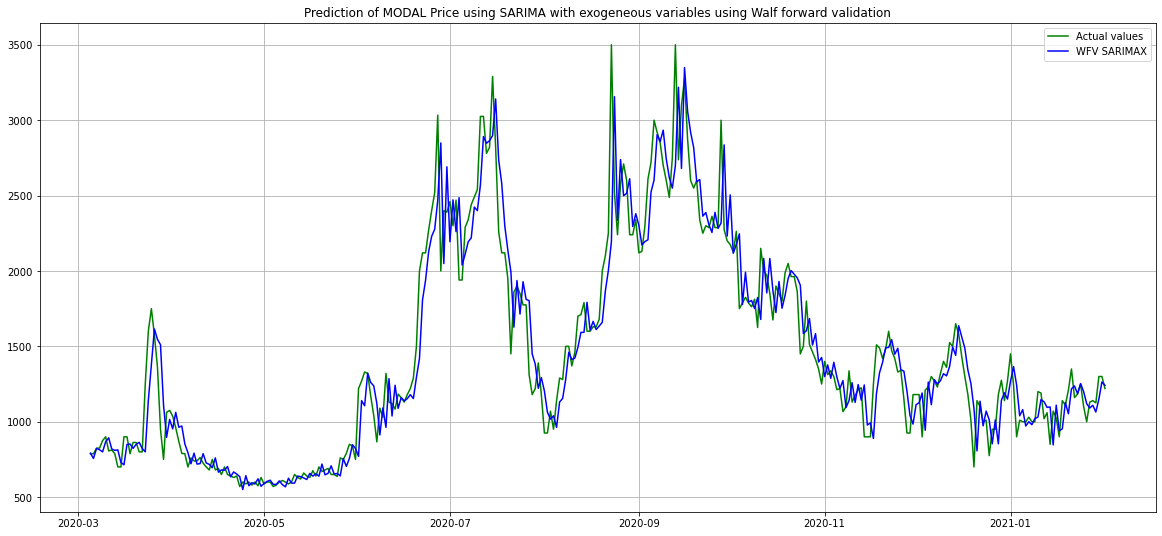

In [858]:
plt.figure(figsize = (20,9))
plt.plot(validation_arima.Actual, color= 'g', label='Actual values')

plt.plot(validation_arima.WFV_SARIMA, color = 'b', label = 'WFV SARIMAX')

plt.title('Prediction of MODAL Price using SARIMA with exogeneous variables using Walf forward validation')
plt.grid()
plt.legend()
plt.show()

#### Observations: 

*  Now , predition envolope is closely following actual values which give most accurate values.



*  RMSE is minimum in this model. (< all previous models)

In [863]:
validation_arima.drop(columns=['WFV_ARIMA'], axis=1, inplace=True)

In [864]:
validation_arima

,Actual,ARIMA,SARIMA,AUTO_ARIMA,Min_Price,Max_Price,WFV_SARIMA
Price_Date,,,,,,,
2020-03-05,787.5,812.443562,791.598157,812.939608,650.0,925.0,791.598157
2020-03-06,787.5,830.982248,759.660264,831.870930,650.0,925.0,756.543652
2020-03-07,825.0,841.376952,800.796061,842.599200,700.0,950.0,822.420591
2020-03-08,825.0,852.582687,800.531778,853.872675,700.0,950.0,814.160035
2020-03-09,875.0,866.102255,772.282392,867.831591,750.0,1000.0,800.032631
...,...,...,...,...,...,...,...
2021-01-28,1140.0,1417.591396,790.245035,1414.060671,900.0,1370.0,1109.083354
2021-01-29,1125.0,1417.601695,753.918803,1414.068939,812.5,1337.5,1064.508616
2021-01-30,1300.0,1417.611773,797.642650,1414.077024,1030.0,1490.0,1149.888612


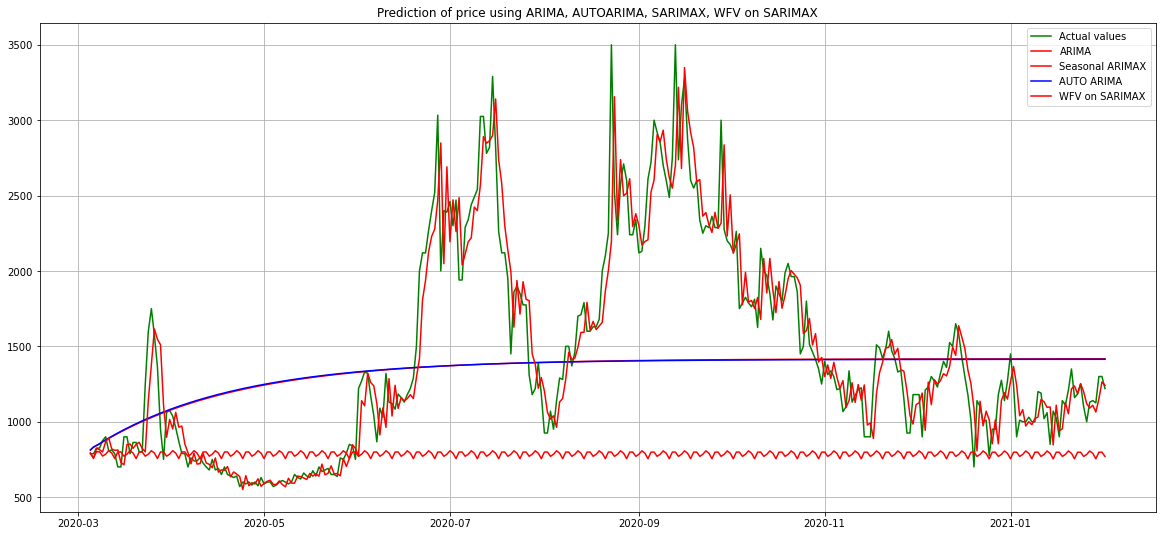

In [867]:
plt.figure(figsize = (20,9))
plt.plot(validation_arima.Actual, color= 'g', label='Actual values')

plt.plot(validation_arima.ARIMA, color = 'r', label = 'ARIMA')
plt.plot(validation_arima.SARIMA, color = 'r', label = 'Seasonal ARIMAX')
plt.plot(validation_arima.AUTO_ARIMA, color = 'b', label = 'AUTO ARIMA')
plt.plot(validation_arima.WFV_SARIMA, color = 'r', label = 'WFV on SARIMAX')

plt.title('Prediction of price using ARIMA, AUTOARIMA, SARIMAX, WFV on SARIMAX')
plt.grid()
plt.legend()
plt.show()

#####  ARIMA models on same plot:


* Vanilla ARIMA fails to give requied values. p,q,d which impacts predictiablity are derived from plots which has least accuarcy. AUTO ARIMA which generated optimal values of paramenters are also not upto the mark as models unable to model seasonal component. 


* Predictions using Seasonal ARIMA with exogeneous variable is trying to add seasonal component to predictions, but the trend component is straing line which falis to model magnitute component of predicted value. 


* Prediction using Walk Forward validations on Seasonal ARIMA with exogeneous variables  follows actual value pattern which has both seasonal and trend components. 


In [ ]:
"""
#From the graph, we can see that, if add +/-10 in wfv_arima value, it will try to follow pattern 


temp =[]
for i in validation_arima.WFV_ARIMA:
    if i> 168:
        temp.append(i+10)
        
    else:
        temp.append(i-20)
        

validation_arima['MANUAL']= temp        


plt.figure(figsize = (18,8))
plt.plot(validation_arima.Actual, color= 'r', label='Actual values')

#plt.plot(validation_arima.WFV_ARIMA, color='b', label ='WFV_ARIMA')
plt.plot(validation_arima.index, temp, color='g', label='NEW')
plt.title('Statistical method for prediction')
plt.legend()

plt.show()
"""

#### EXPONENTIAL SMOOTHING

Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight.

RMSE using Expoential smoothing :  1859.1305597593298


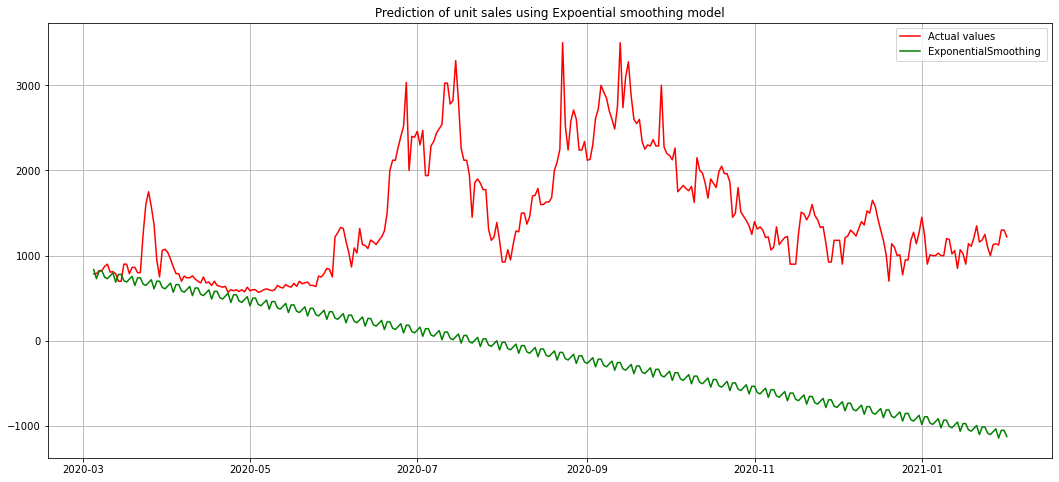

In [872]:
# As our series is highly seasonal, we use Triple Exponential smoothing..it explicitly adds support for seasonality to the univariate time series.
from statsmodels.tsa.holtwinters import ExponentialSmoothing

esmodel = ExponentialSmoothing(blr_train, trend='additive', seasonal='additive').fit()
espredict = esmodel.predict(start=blr_train.shape[0], end=blr_train.shape[0] + blr_test.shape[0])

validation_arima['ExponentialSmoothing'] = espredict

print('RMSE using Expoential smoothing : ', math.sqrt(mean_squared_error(validation_arima.Actual, validation_arima.ExponentialSmoothing)))


plt.figure(figsize = (18,8))

plt.plot(validation_arima.Actual, color= 'r', label='Actual values')
plt.plot(validation_arima.ExponentialSmoothing, color = 'g', label = 'ExponentialSmoothing ')

plt.title('Prediction of unit sales using Expoential smoothing model')
plt.grid()
plt.legend()
plt.show()



#### Observations: 

* Expoential smoothing fails to predict for long range forcasting due to its reducing multiplication factor over time. 




#### Performing Triple Exponential Smoothing with Walk Forward validation

RMSE using Expoential smoothing :  212.19311190489177


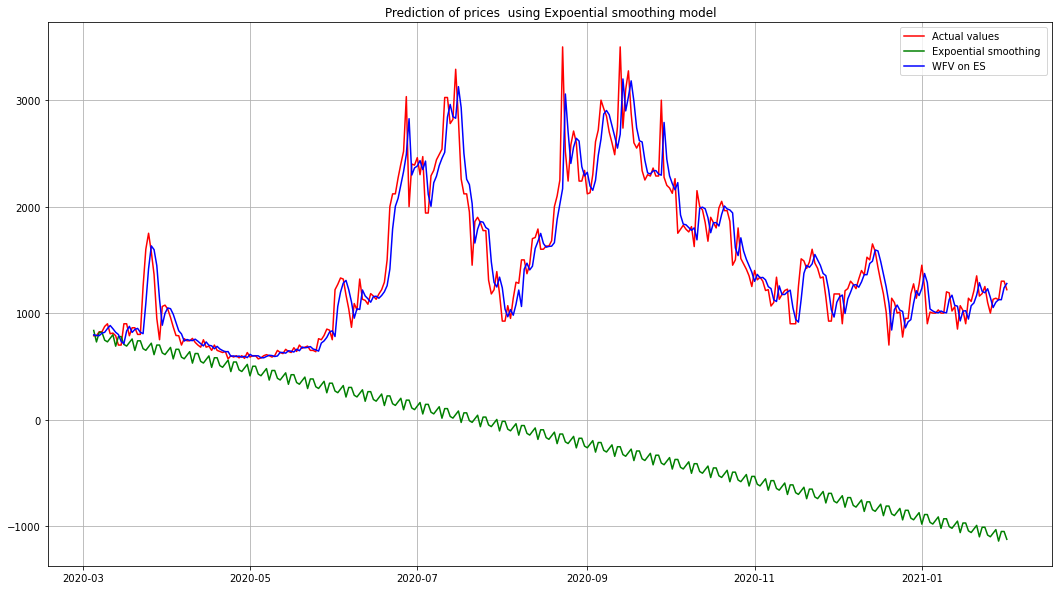

In [870]:
#Prediction using WFV expoential smoothing
x_train = blr_train.values 
lst = []
for i in validation_arima.Actual:
    esmodel = ExponentialSmoothing(x_train, trend='additive').fit()
    espredict = esmodel.forecast()
    lst.append(espredict)
    x_train = np.append(x_train, i)

validation_arima['ES_WFV']= lst

print('RMSE using Expoential smoothing : ', math.sqrt(mean_squared_error(validation_arima.Actual, validation_arima.ES_WFV)))

plt.figure(figsize = (18,10))
plt.plot(validation_arima.Actual, color= 'r', label='Actual values')
plt.plot(validation_arima.ExponentialSmoothing, color = 'g', label = 'Expoential smoothing ')
plt.plot(validation_arima.ES_WFV, color = 'b', label = 'WFV on ES ')

plt.title('Prediction of prices  using Expoential smoothing model')
plt.grid()
plt.legend()
plt.show()

#### Observations: 

* Exponential Smoothing giving better results with walk forward validation where the model fitted well and took less time also.


* We can conclude that where all the models performs poorly if the prediction horizon is bigger. 


* With walk forward methodology model considers recent availble data which improve the predictions. 


* Walk forward validation has the benefit of providing a much more robust estimation that twe could observe results from above plot. 

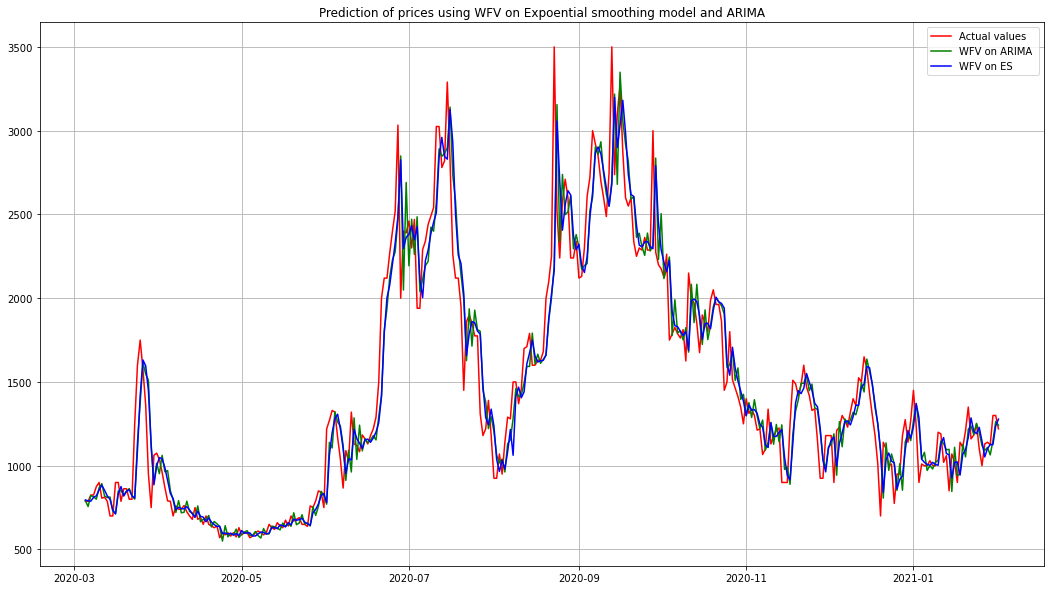

In [875]:
plt.figure(figsize = (18,10))
plt.plot(validation_arima.Actual, color= 'r', label='Actual values')
plt.plot(validation_arima.WFV_SARIMA, color = 'g', label = 'WFV on ARIMA ')
plt.plot(validation_arima.ES_WFV, color = 'b', label = 'WFV on ES ')

plt.title('Prediction of prices using WFV on Expoential smoothing model and ARIMA')
plt.grid()
plt.legend()
plt.show()


In [876]:
# Predictions for different statistical methods 
validation_arima

,Actual,ARIMA,SARIMA,AUTO_ARIMA,Min_Price,Max_Price,WFV_SARIMA,ExponentialSmoothing,ES_WFV
Price_Date,,,,,,,,,
2020-03-05,787.5,812.443562,791.598157,812.939608,650.0,925.0,791.598157,837.013904,[795.9076448765813]
2020-03-06,787.5,830.982248,759.660264,831.870930,650.0,925.0,756.543652,729.219484,[790.2743501256466]
2020-03-07,825.0,841.376952,800.796061,842.599200,700.0,950.0,822.420591,819.499623,[788.294856280088]
2020-03-08,825.0,852.582687,800.531778,853.872675,700.0,950.0,814.160035,819.491735,[811.6109092370094]
2020-03-09,875.0,866.102255,772.282392,867.831591,750.0,1000.0,800.032631,745.907774,[820.0136108647773]
...,...,...,...,...,...,...,...,...,...
2021-01-28,1140.0,1417.591396,790.245035,1414.060671,900.0,1370.0,1109.083354,-1033.132743,[1102.1092044222157]
2021-01-29,1125.0,1417.601695,753.918803,1414.068939,812.5,1337.5,1064.508616,-1140.927163,[1126.379434781559]
2021-01-30,1300.0,1417.611773,797.642650,1414.077024,1030.0,1490.0,1149.888612,-1050.647024,[1125.8732977473976]



#### Observations:

* Models using walk forward validation are performing much better than simple models. Expoential smoothing and Seasonal ARIMA with exogeneous variable is performing better among all.


#### Machine Learning on TS Forcasting 

So far we have implemented statistical models for time-series analysis, we used highly interpretable tests, plots and models to understand and to model various dimensions of the data. 
Traditional statistical methods rely on linear relationships to find structure in the data but may not help with multi-variate series. Statistical models are not good at multistep ahead prediction.



* Multilayer Perceptron :
   MLP are powerful because of their ability to approximate arbitrary non linear functions. It uses Backpropogation technique to train and optimize the network and output of MLP layers are  determined using different activation functions such as Relu, sigmoid, tanh, etc.
 
    

In [707]:
#Importing required librarys for deep learning

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from keras.models import model_from_json

In [877]:
"""
Structering the Input

Structering the dataset which is in the form of sample into sequence. 
AS ML model will not understand whether data is TS or not
So we need to convert the data so that it will crete sequence like structure.

Created train and test dataset for MLP model

"""

train_sequence= pd.DataFrame(blr_train)
train_sequence.columns= ['Actual']


lst =['t-1', 't-2','t-3', 't-4','t-5', 't-6']
for i in range(len(lst)):
    train_sequence[lst[i]] = train_sequence['Actual'].shift((i+1))
train_sequence =train_sequence.dropna()
train_sequence[:3]

,Actual,t-1,t-2,t-3,t-4,t-5,t-6
Price_Date,,,,,,,
2015-01-07,1100.0,1125.0,1140.0,1125.0,1125.0,1170.0,1175.0
2015-01-08,960.0,1100.0,1125.0,1140.0,1125.0,1125.0,1170.0
2015-01-09,900.0,960.0,1100.0,1125.0,1140.0,1125.0,1125.0


In [878]:
test_sequence = pd.DataFrame(blr_test)
test_sequence.columns=['Actual']

for i in range(len(lst)):
    test_sequence[lst[i]] = test_sequence.Actual.shift((i+1))
test_sequence=test_sequence.dropna()
test_sequence[0:3]

,Actual,t-1,t-2,t-3,t-4,t-5,t-6
Price_Date,,,,,,,
2020-03-11,806.25,900.00,875.00,825.0,825.0,787.5,787.5
2020-03-12,812.50,806.25,900.00,875.0,825.0,825.0,787.5
2020-03-13,787.50,812.50,806.25,900.0,875.0,825.0,825.0


In [879]:

X_train = np.array(train_sequence[lst])
y_tarin = np.array(train_sequence.Actual)

X_test = np.array(test_sequence[lst])
y_test = np.array(test_sequence.Actual)

In [880]:
y_tarin.shape

(1884,)

In [882]:

MLP_model= Sequential()
MLP_model.add(Dense(200, input_dim=len(lst), activation ='relu'))
MLP_model.add(Dense(1, activation='linear'))

MLP_model.compile(optimizer='adam', loss='mse')

history = MLP_model.fit(X_train, y_tarin, epochs=100, verbose=0, validation_split=0.2, callbacks=EarlyStopping(monitor='val_loss', patience=10, verbose=1))

Epoch 00017: early stopping


#### Serialization of models

Saving MLP model for further use using serialization techniques. Model has saved using "to_json" function in json file and saved their weughts using "save_weights" function in HDF5 format. 

Saved models are recalled again using "model_from_json" function. 

In [883]:
#Serialize the model to json
model_json = MLP_model.to_json()
with open('MLP_model_1.json', 'w') as file:
    file.write(model_json)
    
# serialize weights to HDF5
MLP_model.save_weights("MLPmodel1.h5")
print("Saved model to disk")

Saved model to disk


In [884]:
# load json and create model
json_file = open("MLP_model_1.json",'r')
loaded_json_file = json_file.read()
json_file.close()

loaded_MLP_model = model_from_json(loaded_json_file)

# load weights into new model
loaded_MLP_model.load_weights("MLPmodel1.h5")
print("Loaded model from disk")


Loaded model from disk


In [886]:
loaded_MLP_model.compile(optimizer='adam', loss='mse')
#pred_loaded = loaded_MLP_model.predict(X_test[0])
X_test[0]

array([900. , 875. , 825. , 825. , 787.5, 787.5])

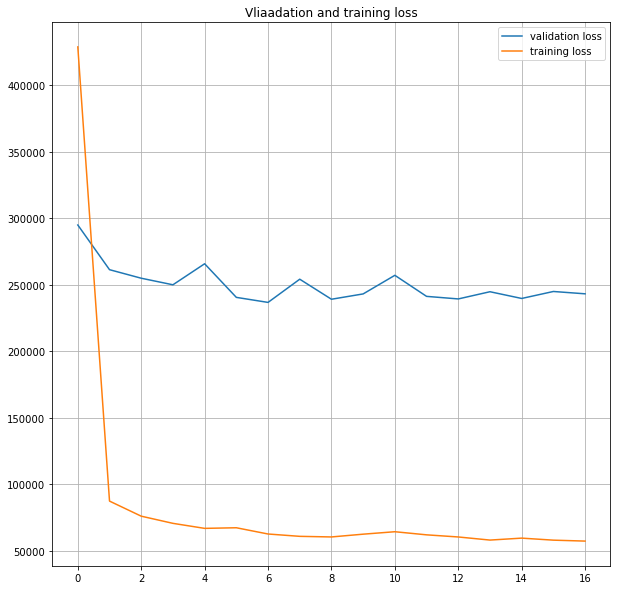

In [885]:

"""#plt.figure(figsize=(10,10))
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['loss'], label='training loss')
plt.legend()
plt.title('Vliaadation and training loss')
plt.grid()
plt.show()
"""

RMSE using MLP:  211.90054871202136


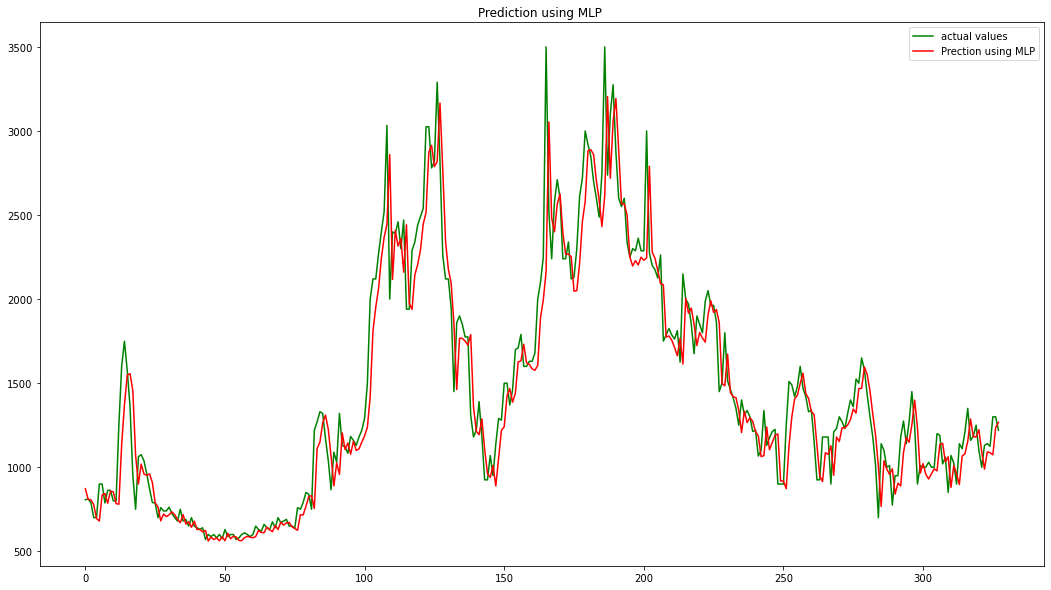

In [887]:
predict_MLP = MLP_model.predict(X_test)

print('RMSE using MLP: ', math.sqrt(mean_squared_error(y_test, predict_MLP)))
plt.figure(figsize=(18,10))
plt.plot(y_test, label='actual values', color='g')
plt.plot(predict_MLP, label = 'Prection using MLP',color ='r')
#plt.plot(pred_loaded, label='Loded model using MLP', color='r')
plt.title('Prediction using MLP ')
plt.legend()
plt.show()

#### observations: 

* Multi step-ahead prediction using MLP is providing comparable results without any assisting technique like Walk forward validation , exogeneous variables.


### LSTM


* The Long Short-Term Memory network or LSTM is a recurrent neural network that can learn and forecast data with sequence such as NLP and TS.

In [888]:
print(X_train.shape, y_tarin.shape,  X_test.shape, y_test.shape)

trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(trainX.shape, testX.shape)


(1884, 6) (1884,) (328, 6) (328,)
(1884, 1, 6) (328, 1, 6)


In [889]:
#Defining the architecture 

lstm_model = Sequential()

lstm_model.add(LSTM(250, input_shape= (1,6), activation="relu"))

lstm_model.add(Dense(1, activation='linear'))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
history = lstm_model.fit(trainX, y_tarin, epochs=100, 
                    validation_split=0.2, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10)]) 

Epoch 1/100
48/48 [==============================] - 2s 10ms/step - loss: 1563642.6607 - val_loss: 374460.8125
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 115505.0981 - val_loss: 338700.7500
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 91436.4602 - val_loss: 337847.9062
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 89846.5929 - val_loss: 329219.6562
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 82275.7808 - val_loss: 316151.3125
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 74082.6719 - val_loss: 311546.6250
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 82035.5590 - val_loss: 300532.0312
Epoch 8/100
48/48 [==============================] - 0s 5ms/step - loss: 65369.2746 - val_loss: 301224.6562
Epoch 9/100
48/48 [==============================] - 0s 5ms/step - loss: 64799.8561 - val_loss: 297769.1250
Epoch 10/100
48/48 [====

In [890]:
lstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 250)               257000    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 251       
Total params: 257,251
Trainable params: 257,251
Non-trainable params: 0
_________________________________________________________________


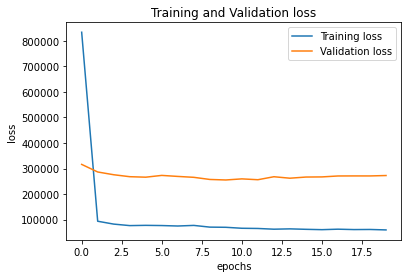

In [721]:

plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


#### Obbservations: 

* training loss has drastically reduced in earier epoch only.


* though validation loss is not reducing over epoches , model is predecting accurate values. 

In [891]:
# Making predictions on the training data
predictions_lstm = lstm_model.predict(testX)
print(len(predictions_lstm))
predictions_lstm[0]

328


array([869.47516], dtype=float32)

In [892]:
print(trainX.shape, X_train.shape, blr_train.shape)
#6 samples are dropping as shile shifting to lag values

#predicted values arein 3 dimension, so making it into 1dim.
temp = []
for i in predictions_lstm:
    temp.append(i[0])

(1884, 1, 6) (1884, 6) (1890,)


RMSE using MLP:  213.6004643779506


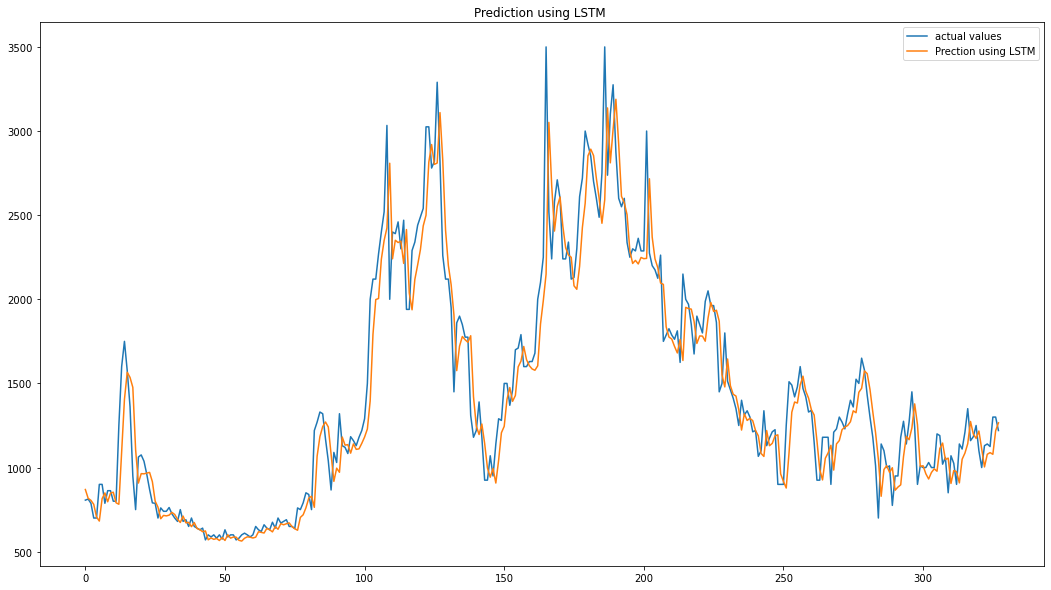

In [893]:
print('RMSE using MLP: ', math.sqrt(mean_squared_error(y_test,temp)))
plt.figure(figsize=(18,10))
plt.plot(y_test, label='actual values')
plt.plot(temp, label = 'Prection using LSTM')

plt.title('Prediction of Modal price using LSTM ')
plt.legend()
plt.show()


RMSE using MLP:  213.6004643779506


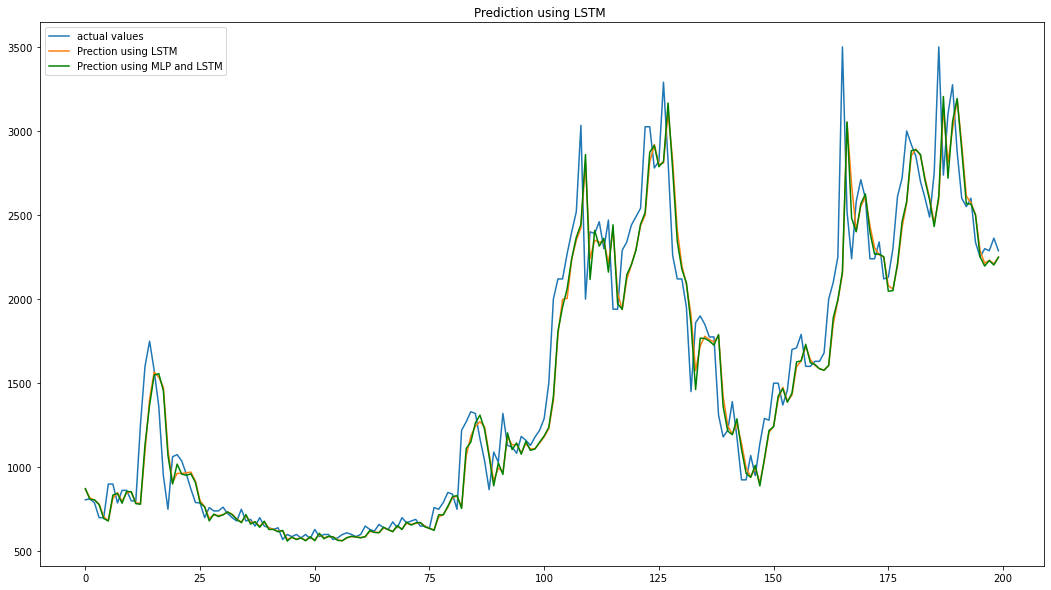

In [895]:
print('RMSE using MLP: ', math.sqrt(mean_squared_error(y_test,temp)))
plt.figure(figsize=(18,10))
plt.plot(y_test[:200], label='actual values')
plt.plot(temp[:200], label = 'Prection using LSTM')
plt.plot(predict_MLP[:200], label = 'Prection using MLP and LSTM', color='g')
plt.title('Prediction using LSTM ')
plt.legend()
plt.show()

###  MULTISTEP AHEAD PREDICTION

Due to simple structure (linear relationship with lag values ), Statistical models fail in multiple step ahead prediction.
Machine learning with complex functions such as MLP can capture replationship between multiple variables and long, strong pattern present in data.

. ML models with below techinques are uesed for predictions. 

* Recursive forecasting techinque : One step model is used multiple times where prediction for the prior time step is used as input for making predictions on the following time step . therefore prediction error gets accumulated.


* Direct Techinque: H different models are used to predict h step ahead.Computationally expensive.


* Multiple Input Multiple Output(MIMO) techinque: One model is learnt to produce all hpredictions at one go. No computationally expensive.



#### Prediction horizon of 30 days with lookback period of 10 days

In [896]:
train_sample = pd.DataFrame(blr_train)
train_sample.columns= ['Price']

In [898]:
lst =['t-1','t-2', 't-3', 't-4', 't-5', 't-6','t-7', 't-8', 't-9','t-10']

for i in range(len(lst)):
    train_sample[lst[i]] = train_sample.Price.shift(i+1)

    
"""
hor = []
for i in range(1,30):
    hor.append(f't+{i}')
hor

"""
    
hor = ['t+1', 't+2','t+3','t+4','t+5','t+6','t+7','t+8','t+9','t+10','t+11','t+12','t+13','t+14','t+15','t+16','t+17','t+18','t+19','t+20','t+21','t+22','t+23','t+24','t+25', 't+26','t+27','t+28', 't+29']
for i in range(len(hor)):
    train_sample[hor[i]] = train_sample.Price.shift(-(i+1))
train_sample= train_sample.dropna()

In [1017]:
train_sample[:2]

,Price,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t+20,t+21,t+22,t+23,t+24,t+25,t+26,t+27,t+28,t+29
Price_Date,,,,,,,,,,,,,,,,,,,,,
2015-01-11,700.0,700.0,900.0,960.0,1100.0,1125.0,1140.0,1125.0,1125.0,1170.0,...,891.666667,891.666667,820.0,825.000000,783.333333,780.0,660.0,740.0,740.0,740.0
2015-01-12,1020.0,700.0,700.0,900.0,960.0,1100.0,1125.0,1140.0,1125.0,1125.0,...,891.666667,820.000000,825.0,783.333333,780.000000,660.0,740.0,740.0,740.0,690.0


In [900]:
X_train= np.array(train_sample[['t-1','t-2', 't-3', 't-4', 't-5', 't-6','t-7', 't-8', 't-9', 't-10']])

y_train = np.array(train_sample[['Price', 't+1', 't+2','t+3','t+4','t+5','t+6','t+7','t+8','t+9','t+10','t+11','t+12','t+13','t+14','t+15','t+16','t+17','t+18','t+19','t+20','t+21','t+22','t+23','t+24','t+25', 't+26','t+27','t+28', 't+29']])

In [901]:
print(X_train.shape, y_train.shape)

(1851, 10) (1851, 30)


In [902]:
MIMO = Sequential()
MIMO.add(Dense(200, input_dim=len(lst), activation='relu'))
MIMO.add(Dense(30))
MIMO.compile(optimizer='adam', loss='mse', metrics='accuracy')

history = MIMO.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2)

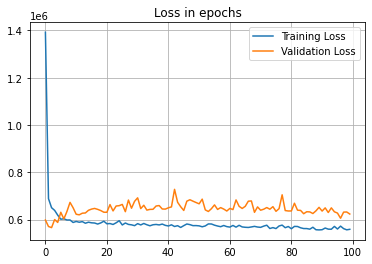

In [903]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label= 'Validation Loss')
plt.title('Loss in epochs')
plt.grid()
plt.legend()
plt.show()

In [904]:

#Serialize the model to json
model_json = MIMO.to_json()
with open('MIMO_model.json', 'w') as file:
    file.write(model_json)
    
# serialize weights to HDF5
MIMO.save_weights("MIMO_model_wts.h5")
print("Saved model to disk")

Saved model to disk


In [905]:
# load json and create model

json_file = open("MIMO_model.json",'r')
loaded_json_file = json_file.read()
json_file.close()

loaded_MIMO_model = model_from_json(loaded_json_file)

# load weights into new model
loaded_MIMO_model.load_weights("MIMO_model_wts.h5")
print("Loaded MIMO model from disk")
loaded_MIMO_model.compile(optimizer='adam', loss='mse')

Loaded MIMO model from disk


In [906]:
test_sample = pd.DataFrame(blr_test)
test_sample.columns= ['Price']

In [911]:
test_sample = test_sample.asfreq('D', method='ffill')


In [912]:
lst =['t-1','t-2', 't-3', 't-4', 't-5', 't-6','t-7', 't-8', 't-9', 't-10']

for i in range(len(lst)):
    test_sample[lst[i]] = test_sample.Price.shift(i+1)

for i in range(len(hor)):
    test_sample[hor[i]] = test_sample.Price.shift(-(i+1))
test_sample= test_sample.dropna()

In [913]:
test_sample[:2]

,Price,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t+20,t+21,t+22,t+23,t+24,t+25,t+26,t+27,t+28,t+29
Price_Date,,,,,,,,,,,,,,,,,,,,,
2020-03-25,1750.0,1600.0,1250.0,800.0,800.0,862.5,862.5,787.5,900.0,900.0,...,750.0,680.0,690.0,650.0,700.0,650.0,640.0,630.0,640.0,570.0
2020-03-26,1575.0,1750.0,1600.0,1250.0,800.0,800.0,862.5,862.5,787.5,900.0,...,680.0,690.0,650.0,700.0,650.0,640.0,630.0,640.0,570.0,600.0


In [914]:
X_test= np.array(test_sample[['t-1','t-2', 't-3', 't-4', 't-5', 't-6','t-7', 't-8', 't-9', 't-10']])

y_test = np.array(test_sample[['Price', 't+1', 't+2','t+3','t+4','t+5','t+6','t+7','t+8','t+9','t+10','t+11','t+12','t+13','t+14','t+15','t+16','t+17','t+18','t+19','t+20','t+21','t+22','t+23','t+24','t+25', 't+26','t+27','t+28', 't+29']])

In [915]:
print(X_test.shape, y_test.shape)

(256, 10) (256, 30)


In [916]:
predictions = MIMO.predict(X_test)

In [917]:
#Container for storing the inout
container = np.ones( (y_test.shape[0],y_test.shape[1]))

In [918]:
print(container.shape, predictions.shape)


(256, 30) (256, 30)


In [919]:

#This function gives list of actual test values as well as list of predicted price value at given horizon

def result_comparasion(horizon):
    
    lst_actual = []
    lst_predicted = []
    
    #print('Given Horizon: ', horizon)
    #print('Length of input and output array is : ', y_test.shape[0])
    
    for i in range(y_test.shape[0]):
        
       
        
        #print(len(lst_actual), len(lst_predicted), end=" ")
        #print(y_test[i][horizon], end=" ")
        
        lst_actual.append(y_test[i][horizon])
        
        
        #print(predictions[i][horizon])
        
        lst_predicted.append(predictions[i][horizon])
        
    return lst_actual, lst_predicted
    
input_, output = result_comparasion(0)  

#print()


In [920]:
len(input_)

256

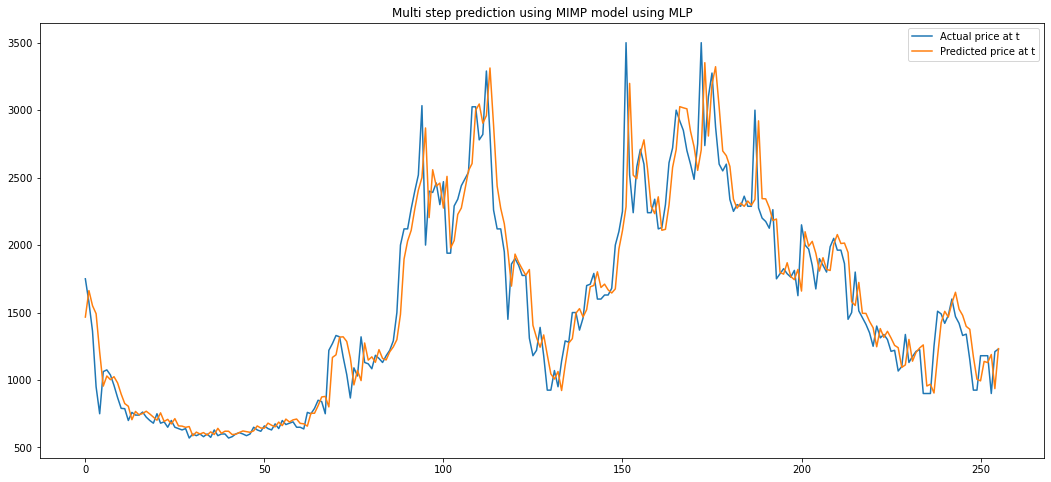

In [921]:
plt.figure(figsize =(18,8))

plt.plot(range(len(y_test)), result_comparasion(0)[0], label='Actual price at t')
plt.plot(range(len(y_test)), result_comparasion(0)[1], label='Predicted price at t')
plt.title('Multi step prediction using MIMP model using MLP')
plt.legend()
plt.show()

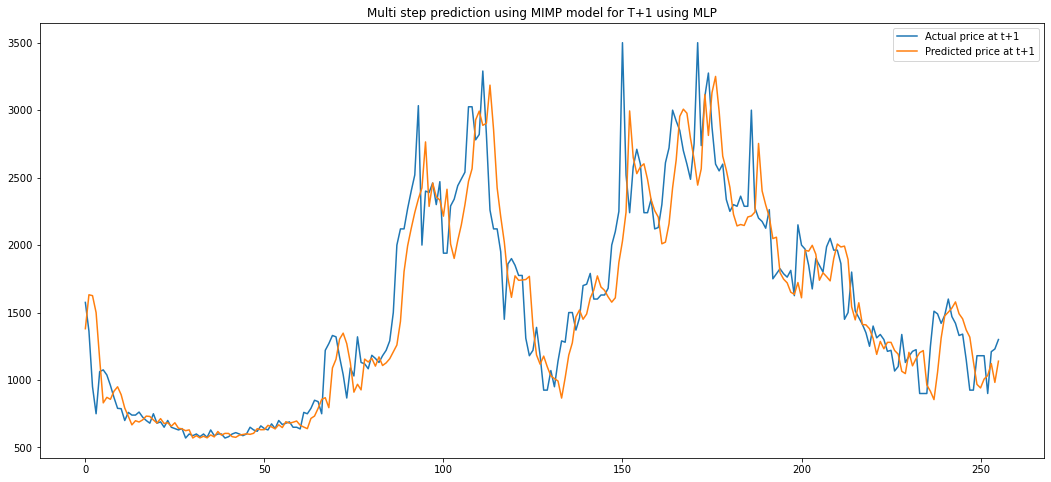

In [922]:
plt.figure(figsize =(18,8))

plt.plot(range(len(y_test)), result_comparasion(1)[0], label='Actual price at t+1')
plt.plot(range(len(y_test)), result_comparasion(1)[1], label='Predicted price at t+1')
plt.title('Multi step prediction using MIMP model for T+1 using MLP')
plt.legend()
plt.show()

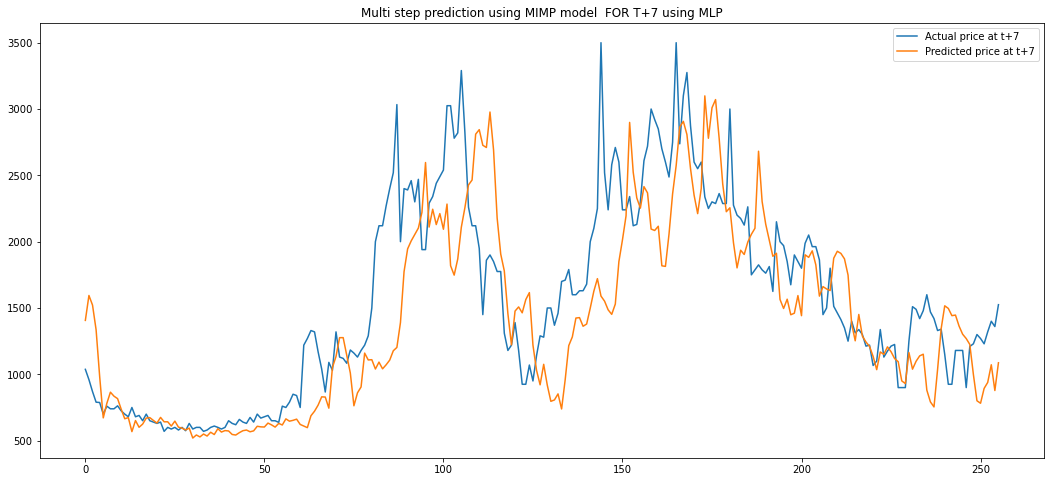

In [1016]:
plt.figure(figsize =(18,8))

plt.plot(range(len(y_test)), result_comparasion(7)[0], label='Actual price at t+7')
plt.plot(range(len(y_test)), result_comparasion(7)[1], label='Predicted price at t+7')

plt.title('Multi step prediction using MIMP model  FOR T+7 using MLP')
plt.legend()
plt.show()

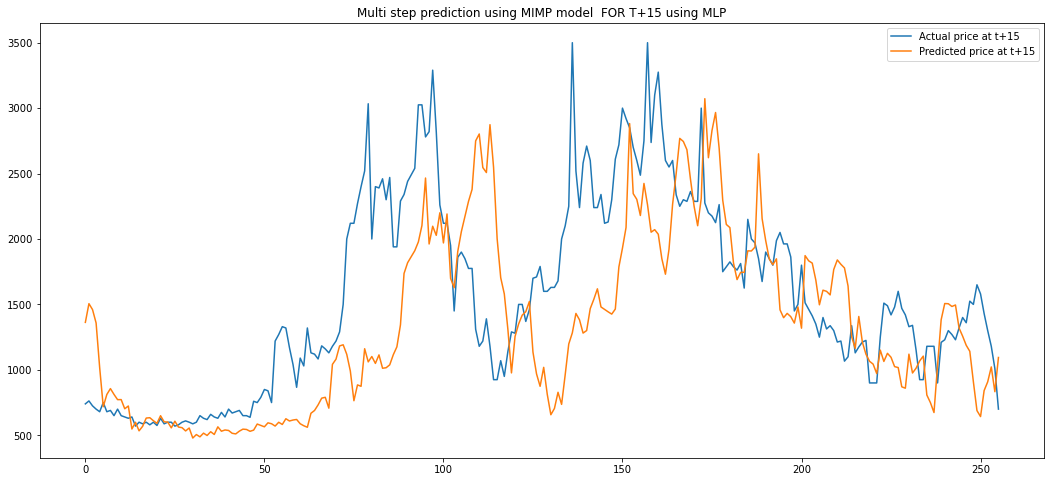

In [924]:
plt.figure(figsize =(18,8))

plt.plot(range(len(y_test)), result_comparasion(15)[0], label='Actual price at t+15')
plt.plot(range(len(y_test)), result_comparasion(15)[1], label='Predicted price at t+15')

plt.title('Multi step prediction using MIMP model  FOR T+15 using MLP')
plt.legend()
plt.show()

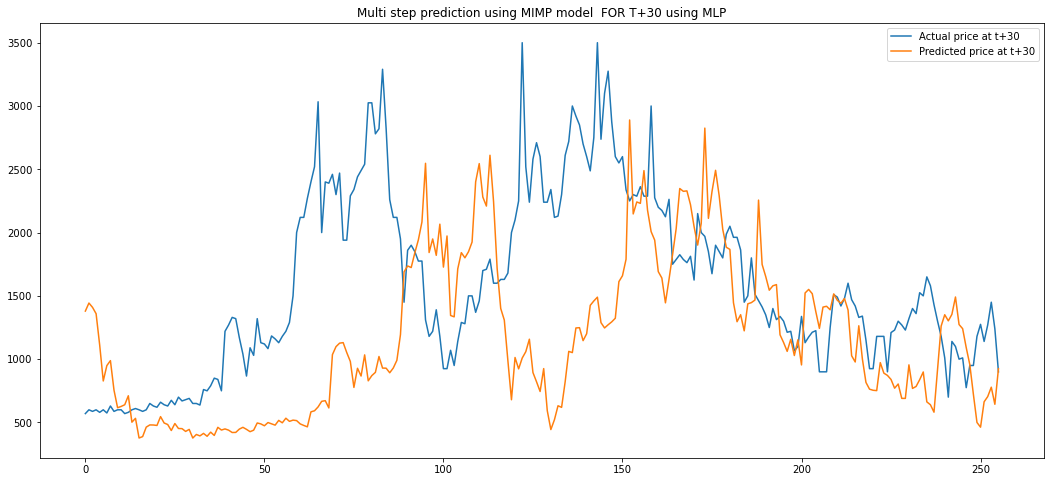

In [925]:
plt.figure(figsize =(18,8))

plt.plot(range(len(y_test)), result_comparasion(29)[0], label='Actual price at t+30')
plt.plot(range(len(y_test)), result_comparasion(29)[1], label='Predicted price at t+30')

plt.title('Multi step prediction using MIMP model  FOR T+30 using MLP')
plt.legend()
plt.show()

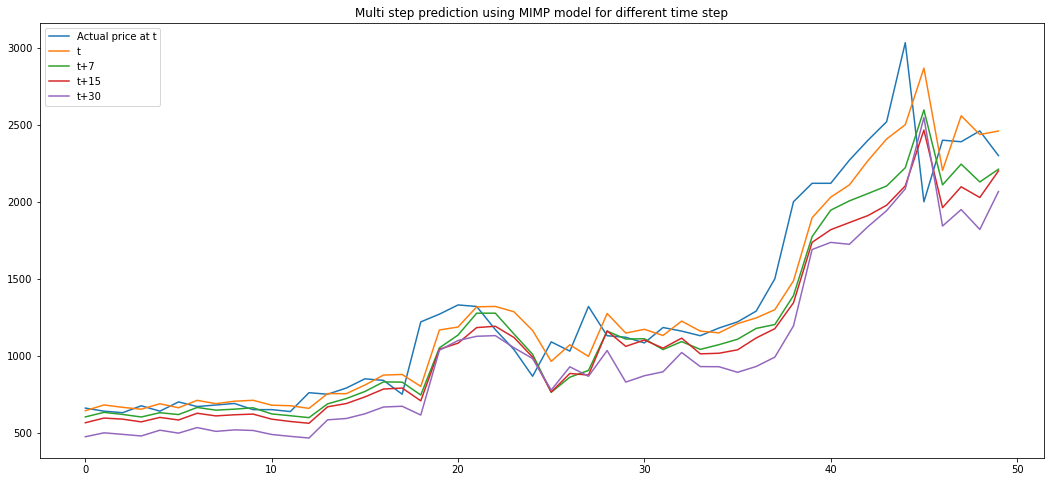

In [928]:
plt.figure(figsize =(18,8))

plt.plot(range(len(y_test[50:100])), result_comparasion(0)[0][50:100], label='Actual price at t')

plt.plot(range(len(y_test[50:100])), result_comparasion(0)[1][50:100], label='t')
plt.plot(range(len(y_test[50:100])), result_comparasion(7)[1][50:100], label='t+7')
plt.plot(range(len(y_test[50:100])), result_comparasion(15)[1][50:100], label='t+15')
plt.plot(range(len(y_test[50:100])), result_comparasion(29)[1][50:100], label='t+30')

plt.title('Multi step prediction using MIMP model for different time step')
plt.legend()
plt.show()

#### Observations :

* As we see, prediction for current day using data till yesterday is giving most accurate prediction value and prediction accuracy degrading as we predict for longer interval.

    * Accuracy(t) > accuracy(t+1) > accuracy (t+7) > accuracy (t+15) > accuracy (t+29)
    
    
* Graph shows lower the prediction horizon, higher the prediction accuracy. Due to hysteresis nature of model.


    
    

